## What are the most energetics, larger and with more signal to noise. 

In [1]:
%pylab inline
import sys
sys.path.append('../code/')
from mwlmc_bfe import smooth_coeff
from scipy import special
import biff
from matplotlib.pyplot import GridSpec

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# data 

#covmat_lmc_path = '../data/sims_ascii/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_covmat_sample_0'
#coeff_lmc_path = '../data/sims_ascii/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_coeff_sample_0'
mass = 1.7995383e-05


covmat_mwlmc_path = '../data/sims_ascii/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mwlmc_path = '../data/sims_ascii/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_coeff_sample_0'


covmat_mw_path = '../data/sims_ascii/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mw_path = '../data/sims_ascii/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_coeff_sample_0'



S_lmc, T_lmc, N_mw = smooth_coeff(coeff_lmc_path, covmat_lmc_path, 0, 4, 20, 20, 20, 8, mass)
S_mw, T_mw, N_mw = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 4, 20, 20, 20, 4, mass)
S_mwlmc, T_mwlmc, N_mwlmc = smooth_coeff(coeff_mwlmc_path, covmat_mwlmc_path, 0, 4, 20, 20, 20, 4, mass)



NameError: name 'coeff_lmc_path' is not defined

In [ ]:
def coeff_hist(S):
    vmin = np.ma.masked_invalid(np.log10(np.abs(S[:,:,0].flatten()))).min()
    vmax = np.max(np.log10(np.abs(S)))

    fig, ax = subplots(1, 3, figsize=(14, 4))

    fig.suptitle('LMC coefficients amplitudes', y=1.06)

    for i in range(3):
        im = ax[i].imshow(np.log10(np.abs(((S[:,:,i])))), origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
        ax[i].set_xlim(-0.5, 10)
        ax[i].set_ylim(-0.5, 10)
        ax[i].set_xlabel('$n$')
        ax[i].set_title('$m=${}'.format(i))
        if i ==0:
            ax[i].set_ylabel('$l$')
    #ax[3].set_colorbar()
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels)
    cbar.set_label(r'$\rm{Log_{10}\ S_{nlm}}$')


In [ ]:
def coeff_power(S, T, fig_title, fig_name, max_m=0, max_n=0, max_l=0):
    
    vmin = np.ma.masked_invalid(np.log10((S**2 + T**2)**0.5)).min()
    vmax = np.max(np.log10((S**2 + T**2)**0.5))

    index_m = np.where(np.abs(S[:,:,:3])>0)
    if max_m==0:
        max_m = np.max(index_m[2])
    if max_n==0:
        max_n = np.max(index_m[0])
    if max_l==0:
        max_l = np.max(index_m[1])

    print(max_n, max_l)
    if max_m < 4:
        fig, ax = subplots(max_m+1, 1, figsize=(6, 9), sharex=True)
    elif ((max_m < 8) & (max_m>3)):
        fig, ax = subplots(2, 4, figsize=(14, 9), sharex=True, sharey=True)
    elif (max_m>7):
        fig, ax = subplots(3, 4, figsize=(14, 14), sharex=True, sharey=True)
    print(max_m)

    fig.suptitle(fig_title, y=1.02)

    if max_m < 5:
        for i in range(max_m+1):
            im = ax[i].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[i].set_xlim(-1, max_n+1)
            ax[i].set_ylim(-1, max_l+1)
            ax[i].set_ylabel('$l$')
            ax[i].set_title('$m=${}'.format(i))
            ax[i].set_xticks(np.arange(0, max_n+1, 2))
            ax[i].set_yticks(np.arange(0, max_l+1, 2))
            ax[i].set_yticklabels(np.arange(0, max_l+1, 2))

            if i ==2:
                ax[i].set_xlabel('$n$')
    elif (max_m>3):
        j = 0 
        k=0
        for i in range(max_m+1):
            print(j, i)
            im = ax[j][k].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[j][k].set_xlim(-1, max_n+1)
            ax[j][k].set_ylim(-1, max_l+1)
            ax[j][k].set_ylabel('$l$')
            ax[j][k].set_title('$m=${}'.format(i))
            k+=1
            if i == 2:
                ax[j][i].set_xlabel('$n$')
            elif i%3 == 0:
                j+=1 
                k=0
                
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.15, -0.05, 0.8, 0.04])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels, orientation='horizontal')
    cbar.set_label(r'$\rm{Log_{10}\ \left( S_{nlm}^2 + T_{nlm}^2 \right)}$')
    fig.tight_layout()
    #fig.savefig(fig_name, bbox_inches='tight')

In [ ]:
def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def Anl_array(nmax, lmax):
    A_nl_array = np.zeros((nmax, lmax))
    for j in range(nmax):
        for i in range(lmax):
            A_nl_array[j][i] = Anl(j, i)
    return A_nl_array

def coeff_energy(ax, S, T, m, nmax, lmax, vmin, vmax):
    A_nl = Anl_array(nmax, lmax)
    A = (S[:,:,m]**2 + T[:,:,m]**2)**0.5
    im = ax.imshow(np.log10(np.abs(A/A_nl)).T, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    #fig.colorbar()
    return im


In [ ]:
#coeff_power(S_lmc, T_lmc, fig_title='LMC coeff. power', fig_name='LMC_coefficients_power.png' ,max_n=20, max_l=8)

In [ ]:
#coeff_power(S_mwlmc, T_mwlmc, fig_title="MW \& LMC's DM debris coeff. power", fig_name='MW_coefficients_power.png', max_m=2, max_n=20, max_l=8)

In [ ]:
#coeff_power(S_mw, T_mw, fig_title='MW coeff. power', 
#            fig_name='MW_ref_coefficients_power.png', max_m=3, max_n=20, max_l=20)

In [ ]:
mass = 1.577212515E-6 
covmat_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_covmat_sample_'
coeff_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_coeff_sample_'

snap_n = 90
S_mw, T_mw, N_mw, SN_out = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 10, 20, 20, 20, 5, mass, snap=90, sn_out=1)


In [4]:
print(N_mw)

NameError: name 'N_mw' is not defined

In [5]:
#coeff_power(S_mw, T_mw, fig_title='LMC coeff. power', fig_name='MW_coefficients_power.png' ,max_n=20, max_l=13)

In [6]:
SN_cuts = np.linspace(1, 40, 40)
for i in range(len(SN_cuts)):
    mass = 1.577212515E-6 
    covmat_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_covmat_sample_'
    coeff_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_coeff_sample_'

    snap_n = 90
    S_mw, T_mw, N_mw, SN_out = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 10, 20, 20, 20, 
                                            SN_cuts[i], mass, snap=90, sn_out=1)



    y_grid = np.arange(-200, 200, 1.5)
    z_grid = np.arange(-200, 200, 1.5)
    y_grid, z_grid = meshgrid(y_grid, z_grid)
    bins=len(np.arange(-200, 200, 1.5))

    xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                         y_grid.flatten(),
                                         z_grid.flatten()]).T)

    rho_biff = biff.density(np.ascontiguousarray(xyz), S_mw, T_mw, M=1, r_s=40.85)

    S_000 = np.zeros((1, 1, 1))
    T_000 = np.zeros((1, 1, 1))
    S_000[0][0][0] = S_mw[0][0][0]

    rho_biff_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)


    figsize(10,4)
    subplot(1, 2, 1)
    title('N coefficients={:02d}'.format(N_mw))
    contourf(y_grid, z_grid, np.log10(np.abs(rho_biff)).reshape(bins, bins), 50,
             origin='lower', cmap='Spectral_r', vmin=-7, vmax=-1.65)

    xlim(-200, 200)
    ylim(-200, 200)
    colorbar()


    subplot(1, 2, 2)
    contourf(y_grid, z_grid, ((rho_biff/rho_biff_base)-1).reshape(bins, bins), 50,
             origin='lower', cmap='Spectral_r', vmin=-0.45, vmax=0.45)

    xlim(-200, 200)
    ylim(-200, 200)
    colorbar()
    savefig('wake_recontruction_sn_{:03d}.png'.format(40-i))
    close()

TypeError: smooth_coeff() got an unexpected keyword argument 'sn_out'

In [14]:
def density_slab(fig, ax, S, T, vmin, vmax, delta=0):
    y_grid = np.arange(-200, 200, 1.5)
    z_grid = np.arange(-200, 200, 1.5)
    y_grid, z_grid = meshgrid(y_grid, z_grid)
    bins=len(np.arange(-200, 200, 1.5))

    xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                         y_grid.flatten(),
                                         z_grid.flatten()]).T)

    rho_biff = biff.density(np.ascontiguousarray(xyz), S, T, M=1, r_s=40.85)


    #figsize(10,4)
    #subplot(1, 2, 1)
    
    if delta==0:
        im = ax.contourf(y_grid, z_grid, np.log10(np.abs(rho_biff)).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', vmin=vmin, vmax=vmax)

    #subplot(1, 2, 2)
    elif delta==1:
        S_000 = np.zeros((1, 1, 1))
        T_000 = np.zeros((1, 1, 1))
        S_000[0][0][0] = S[0][0][0]
        rho_biff_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)
        im = ax.contourf(y_grid, z_grid, ((rho_biff/rho_biff_base)-1).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', vmin=vmin, vmax=vmax)

    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    fig.colorbar(im, ax=ax)

    
def coefficients_viz(fig, ax, m, I, vmin, vmax):
    im = ax.imshow(np.log10(I[:,:,m]).T, origin='lower', vmin=vmin, vmax=vmax)
    return im
    


In [15]:
def summary_figure(S, T, N_coeff, I, vmin2, vmax2, fig_name):
    """
    Figure with summary of the coefficients and it's 
    density information 
    
    """

    fig = plt.figure(figsize=(12, 10))

    gs1 = GridSpec(2, 1)
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    density_slab(fig, ax1, S, T, delta=0, vmin=-7, vmax=-1.65)
    density_slab(fig, ax2, S, T, delta=1, vmin=-0.45, vmax=0.45)
    ax1.set_title('N coefficients={:02d}'.format(N_coeff))
    ax1.set_xlabel(r'$\rm{y[kpc]}$')
    ax1.set_ylabel(r'$\rm{z[kpc]}$')

    ax2.set_xlabel(r'$\rm{y[kpc]}$')
    ax2.set_ylabel(r'$\rm{z[kpc]}$')

    gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

    gs2 = GridSpec(3, 1)
    m_order=0
    for ss in gs2:
        if m_order==3:
            continue
        else:
            ax = fig.add_subplot(ss)
            im = coefficients_viz(fig, ax, m_order, I, vmin2, vmax2)
            m_order+=1
            ax.set_ylim(-0.5, 16)
            ax.set_ylabel("$l$")
            ax.text(15, 14, '$m=${}'.format(m_order))

    ax.set_xlabel("$n$")

    cbar_ax1 = fig.add_axes([0.6, 0.01, 0.33, 0.02])
    fig.colorbar(im, ax=ax, orientation='horizontal', cax=cbar_ax1)


    gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

    # We may try to match the top and bottom of two grids ::
    top = min(gs1.top, gs2.top)
    bottom = max(gs1.bottom, gs2.bottom)

    gs1.update(top=top, bottom=bottom)
    gs2.update(top=top, bottom=bottom)
    #plt.show()
    savefig(fig_name, bbox_inches='tight')


../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
../code/coef

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created thro

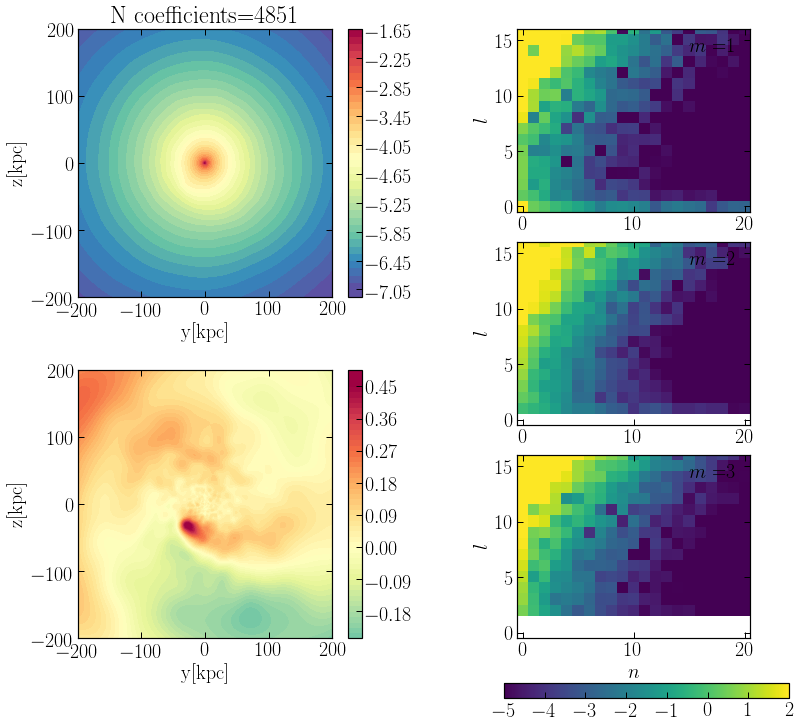

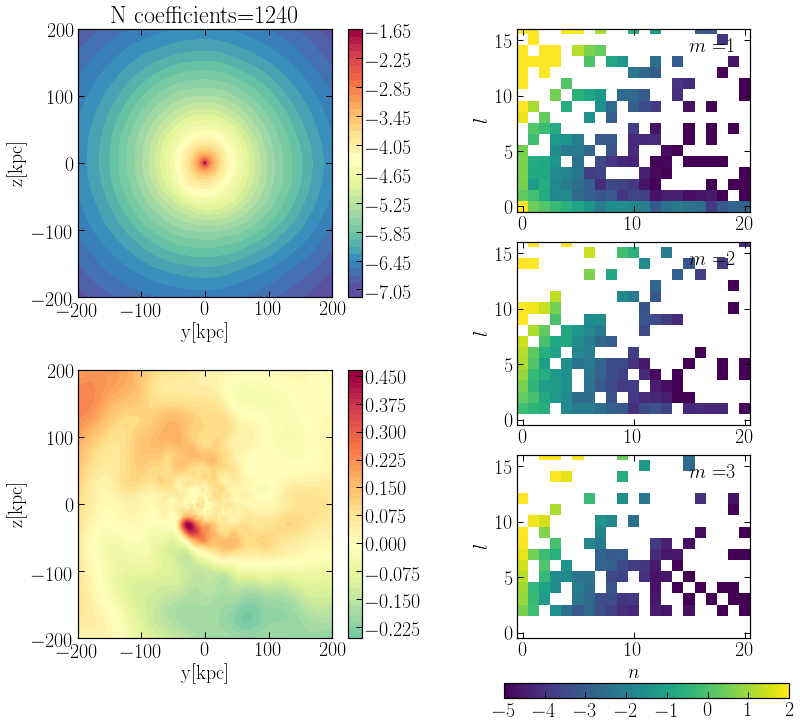

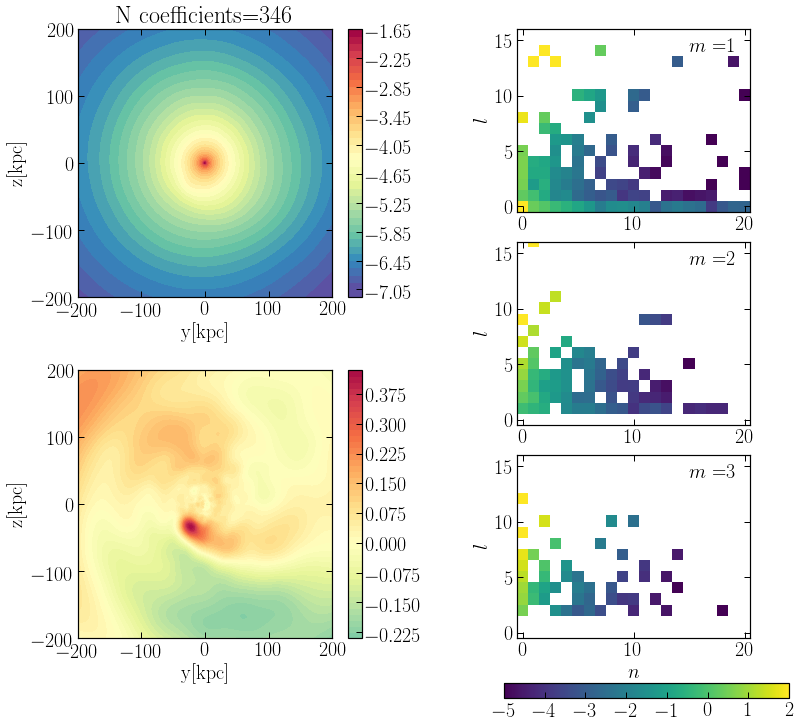

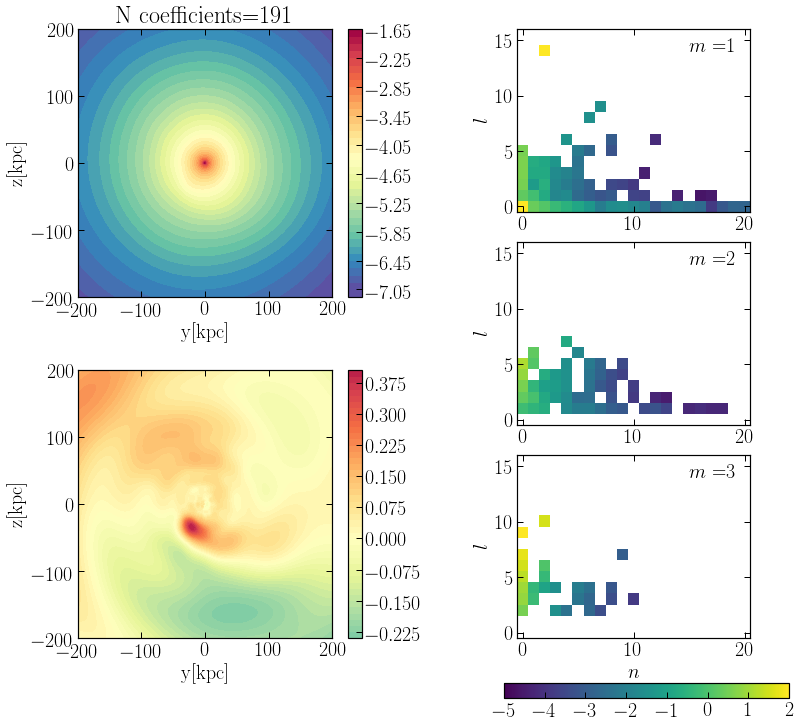

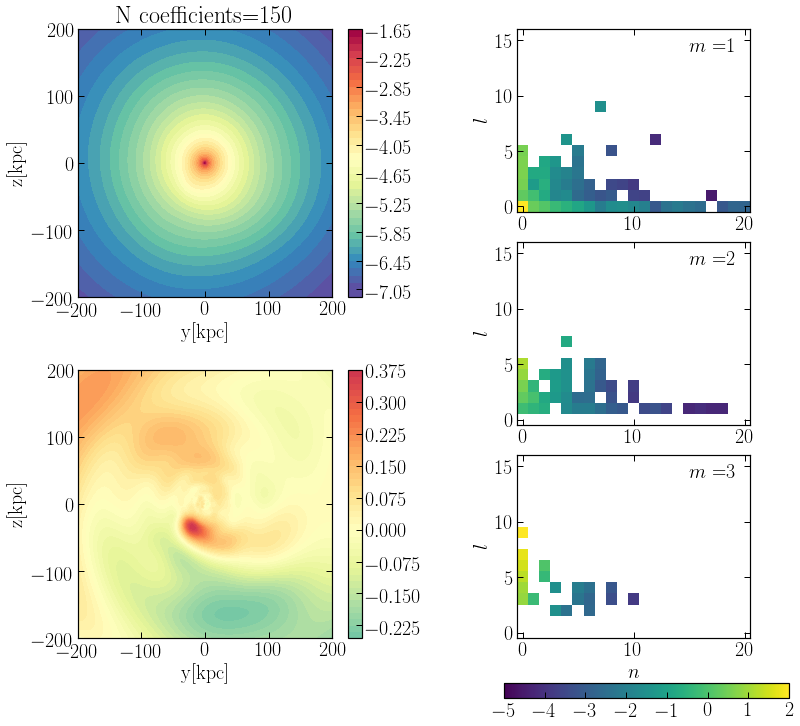

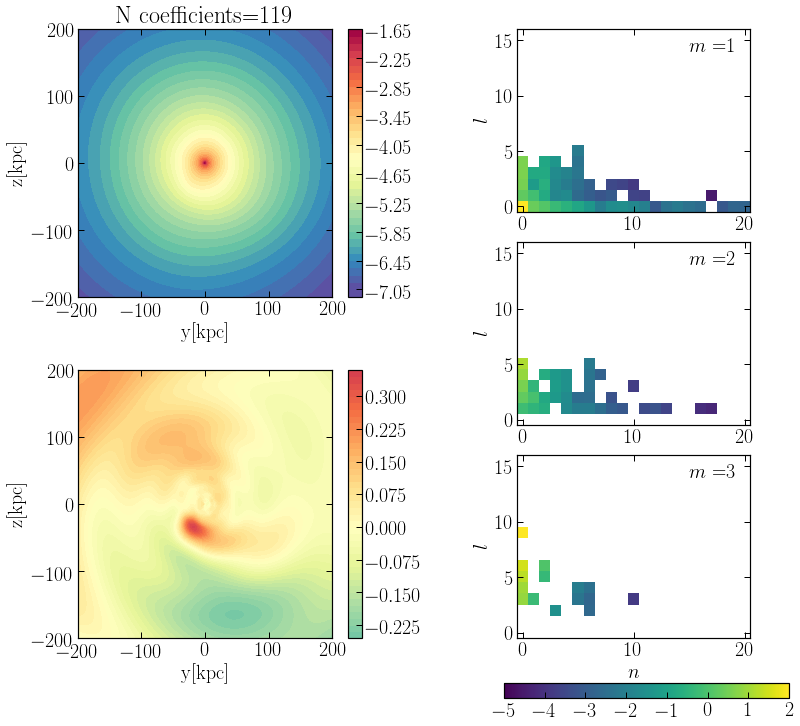

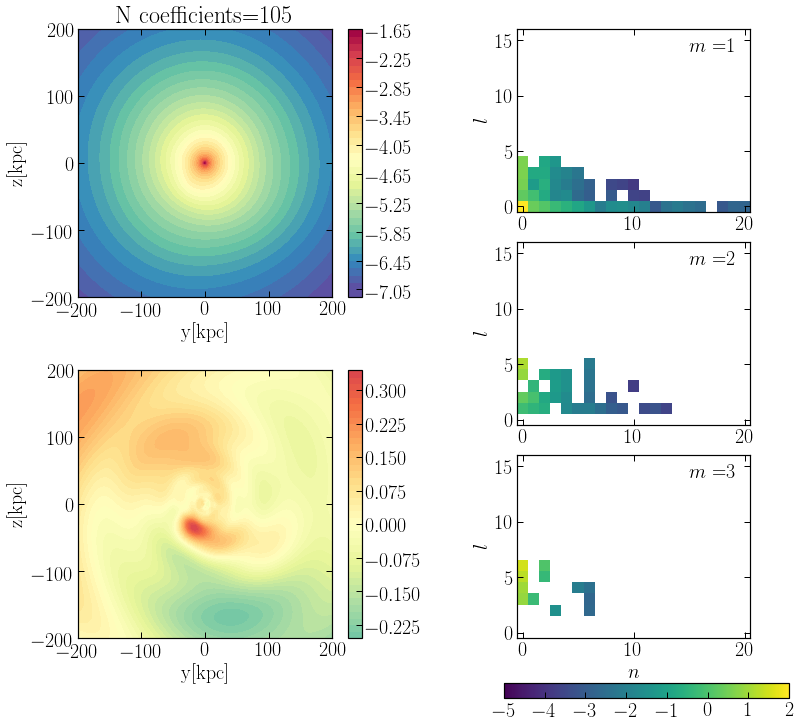

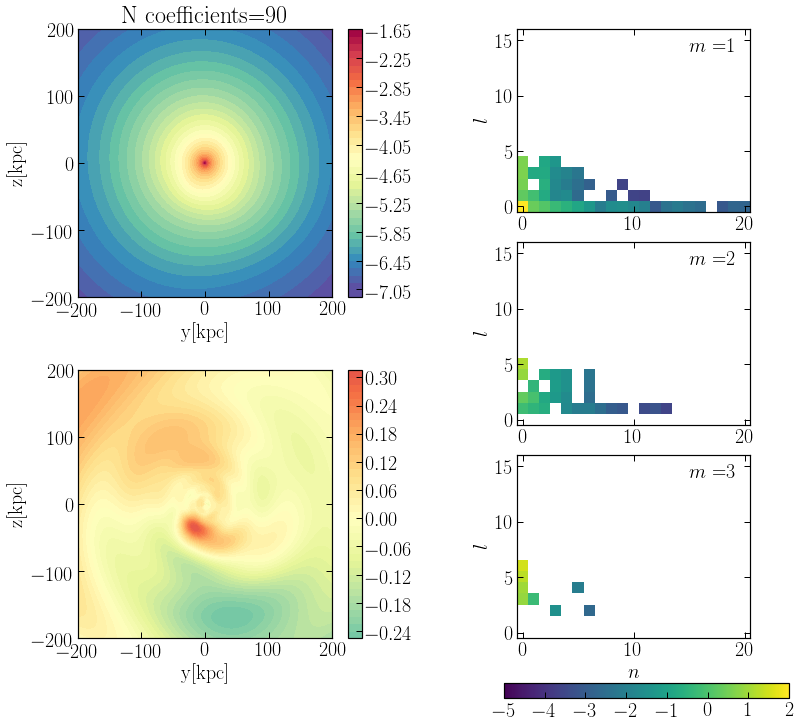

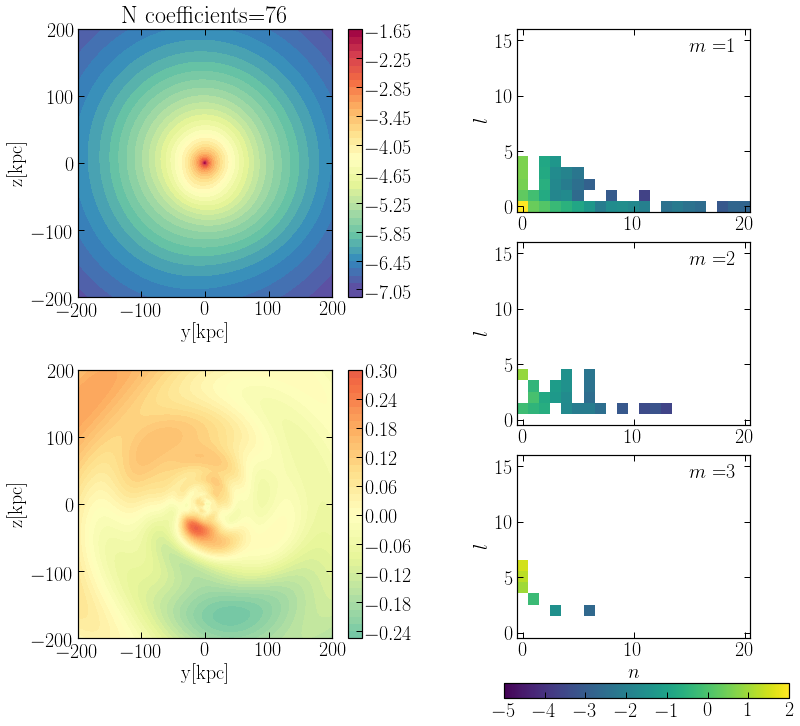

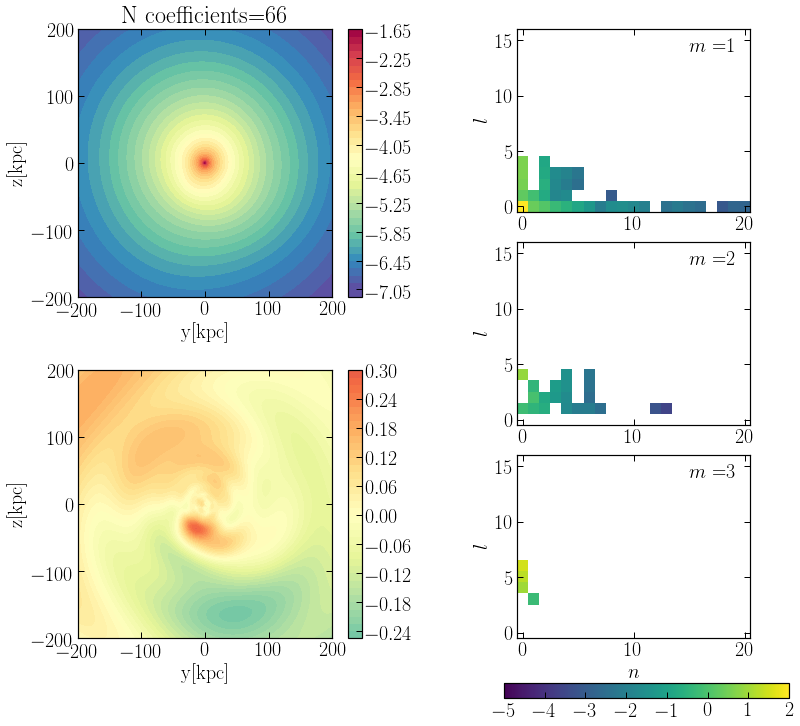

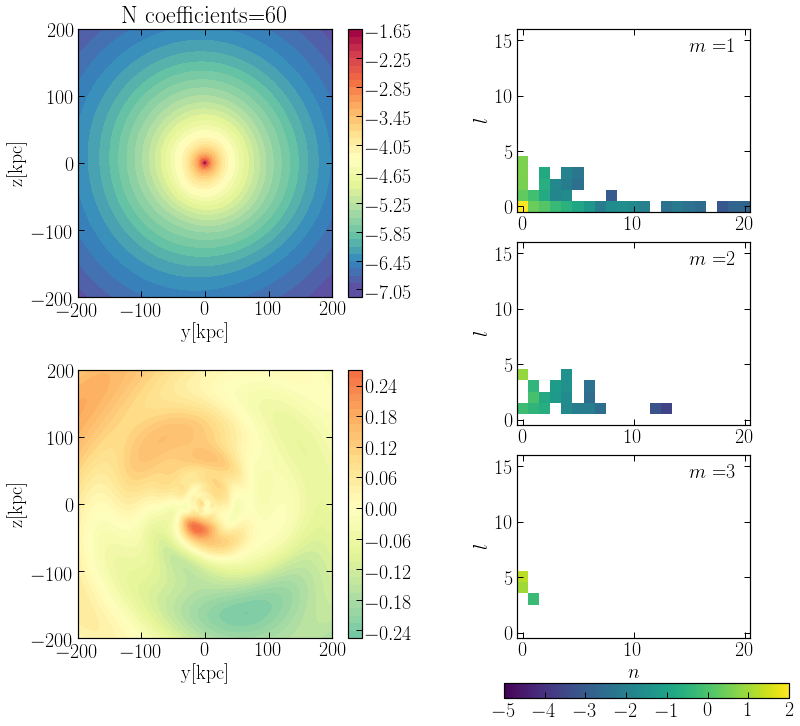

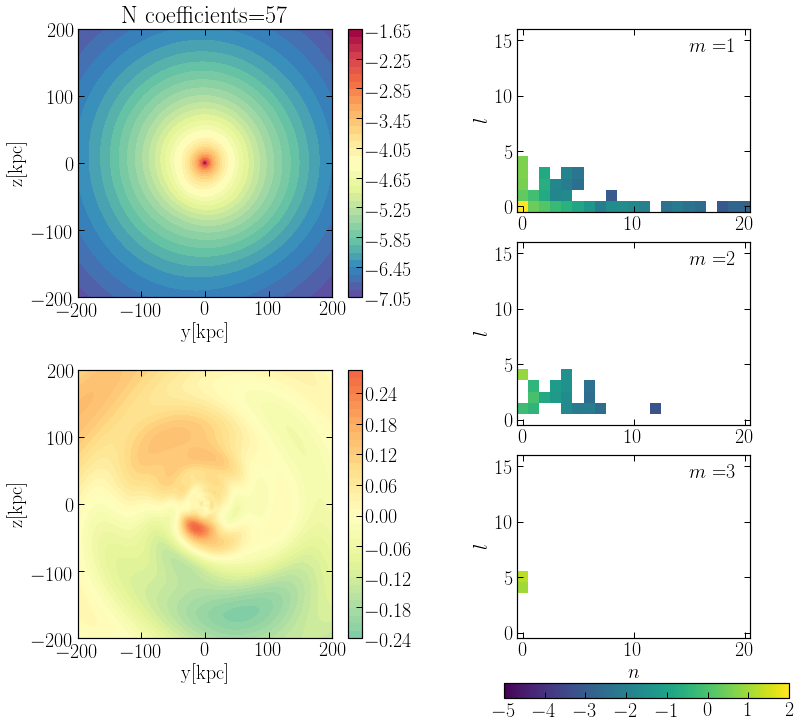

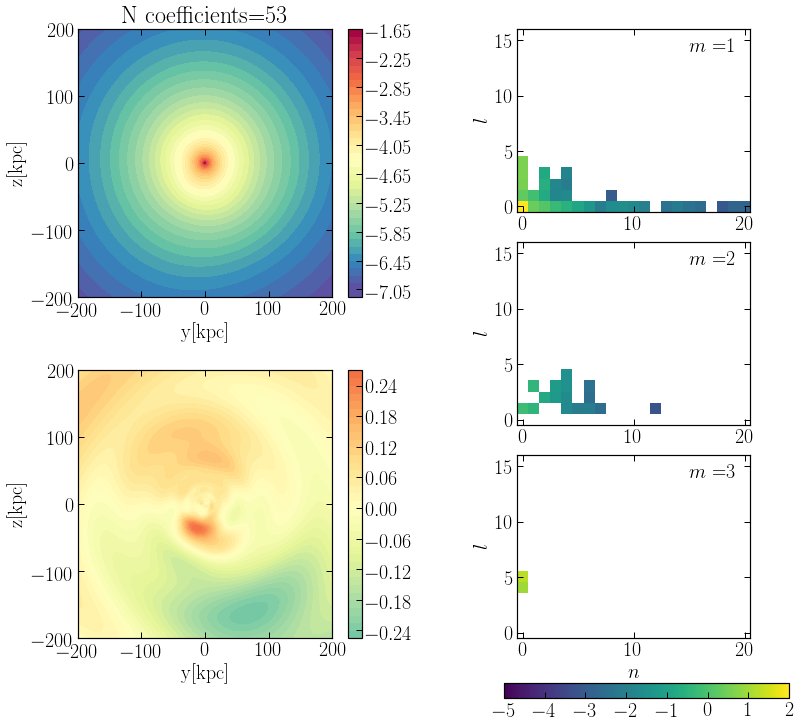

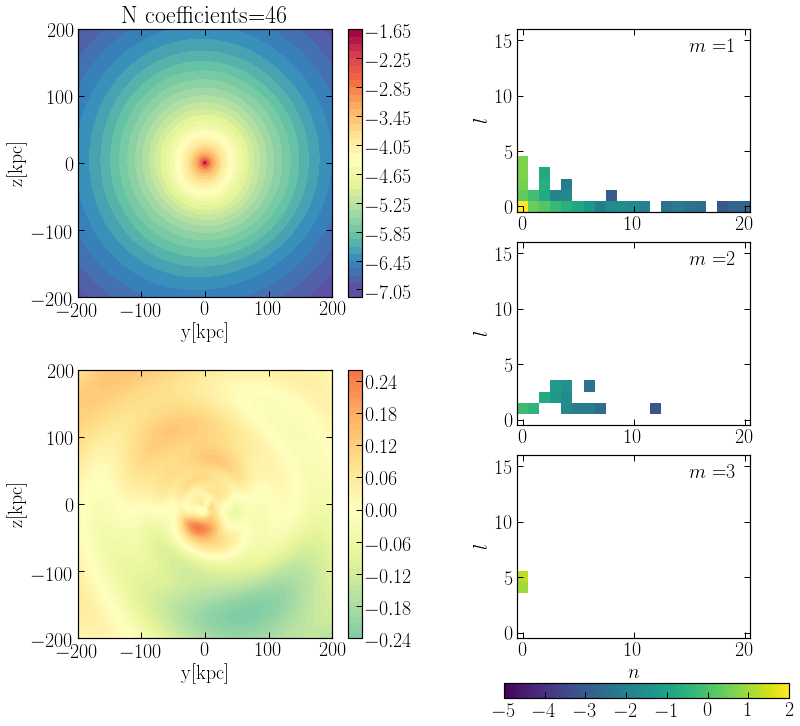

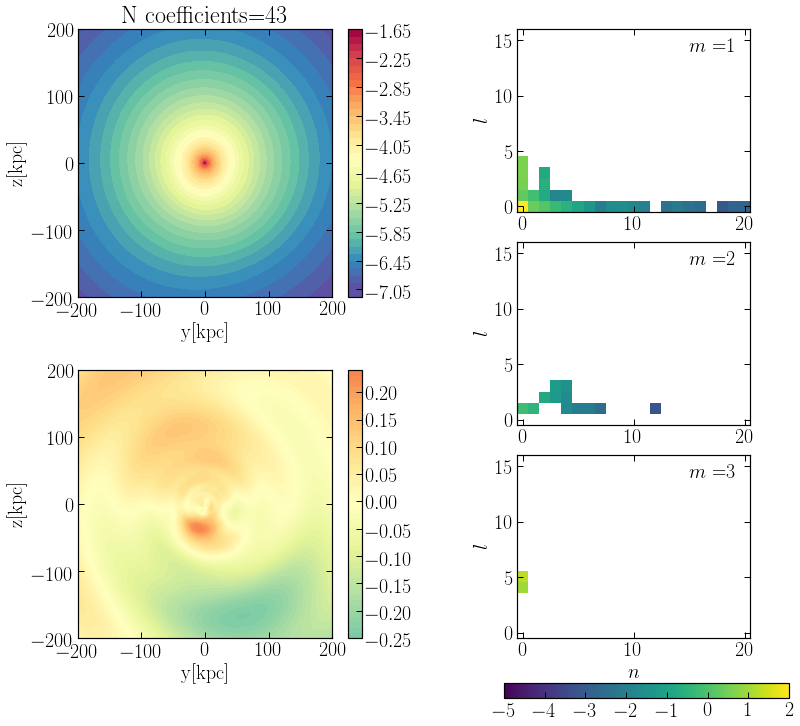

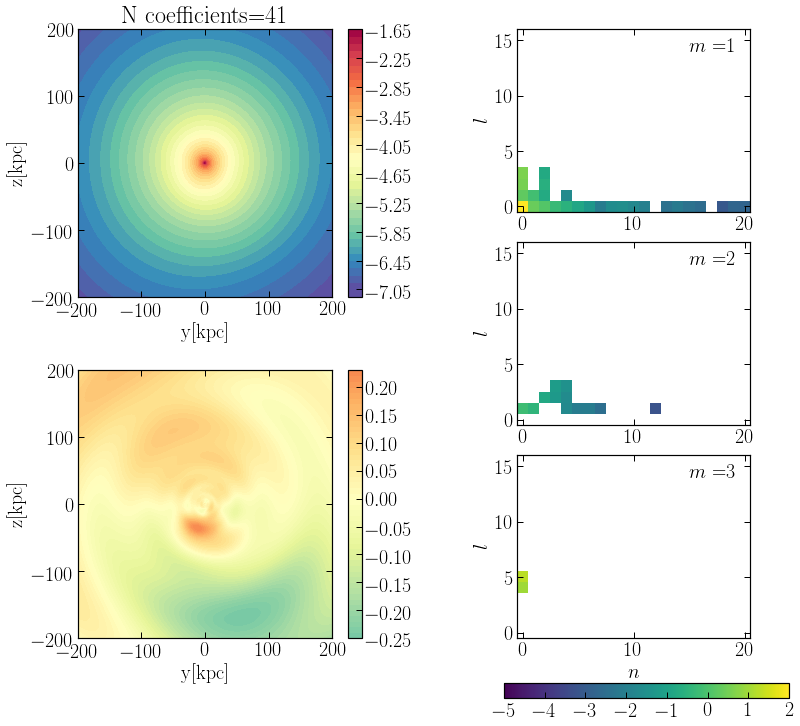

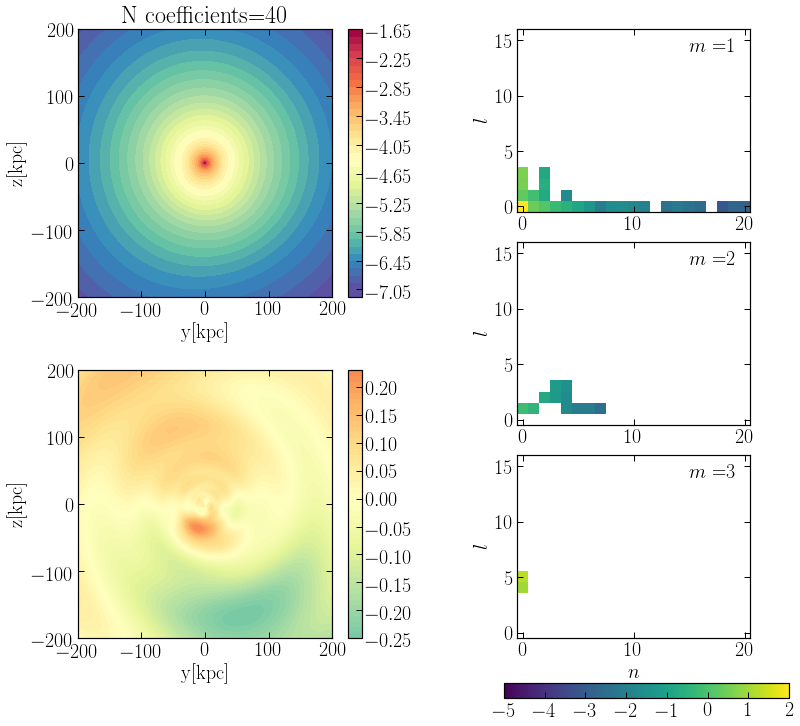

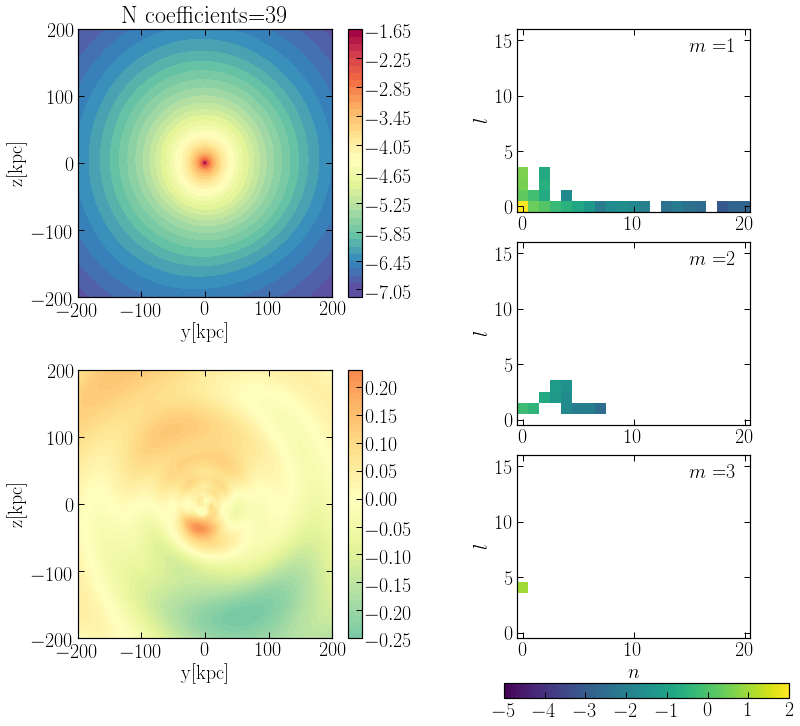

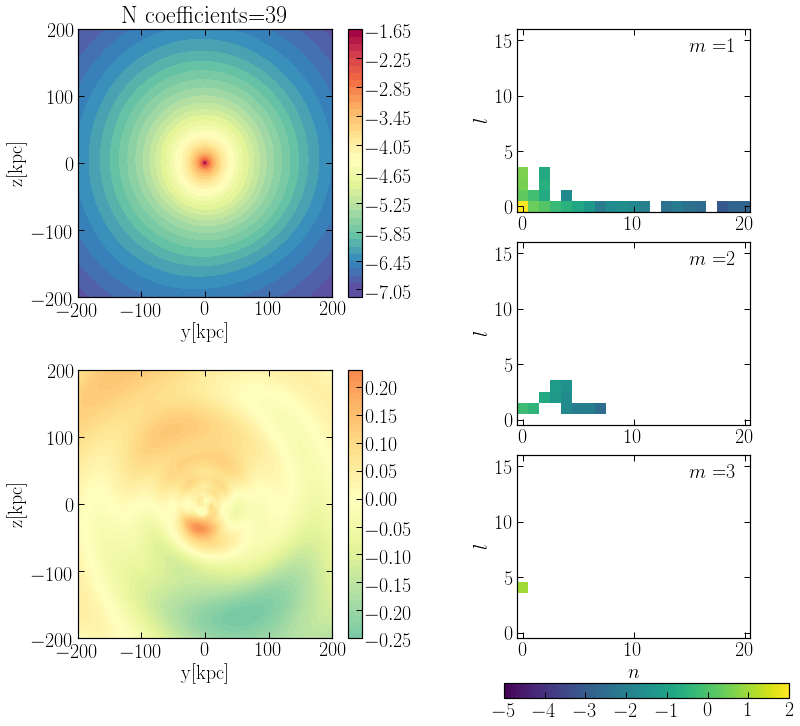

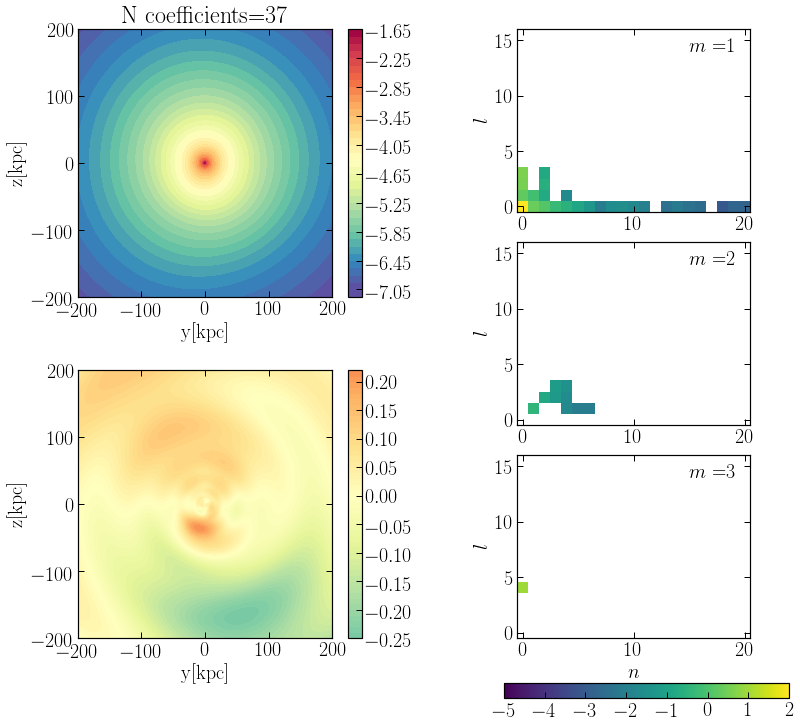

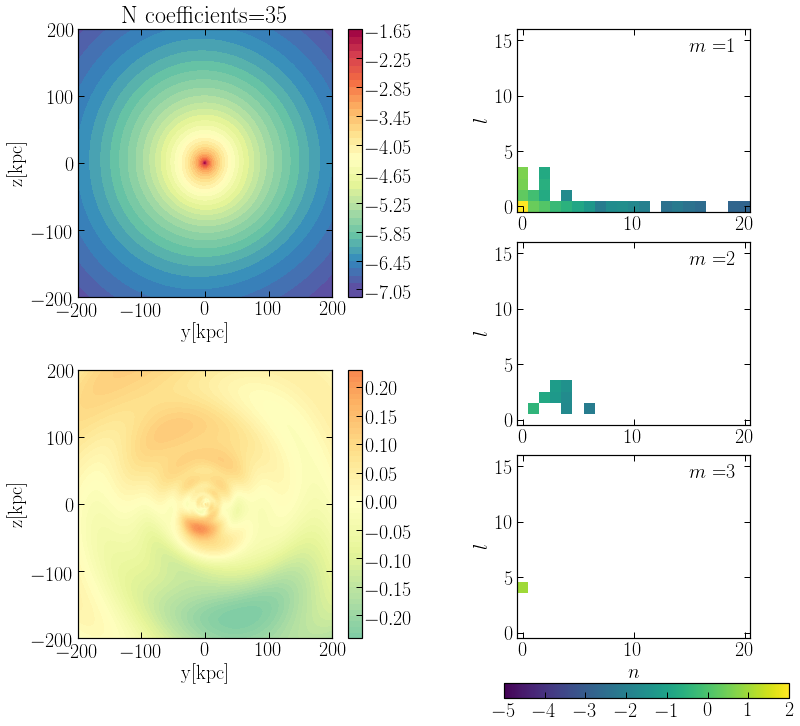

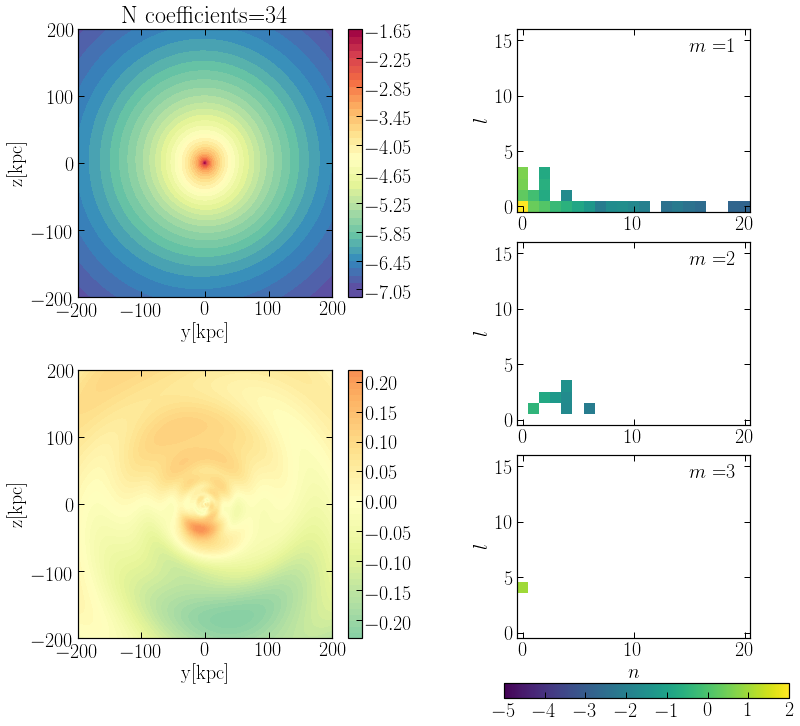

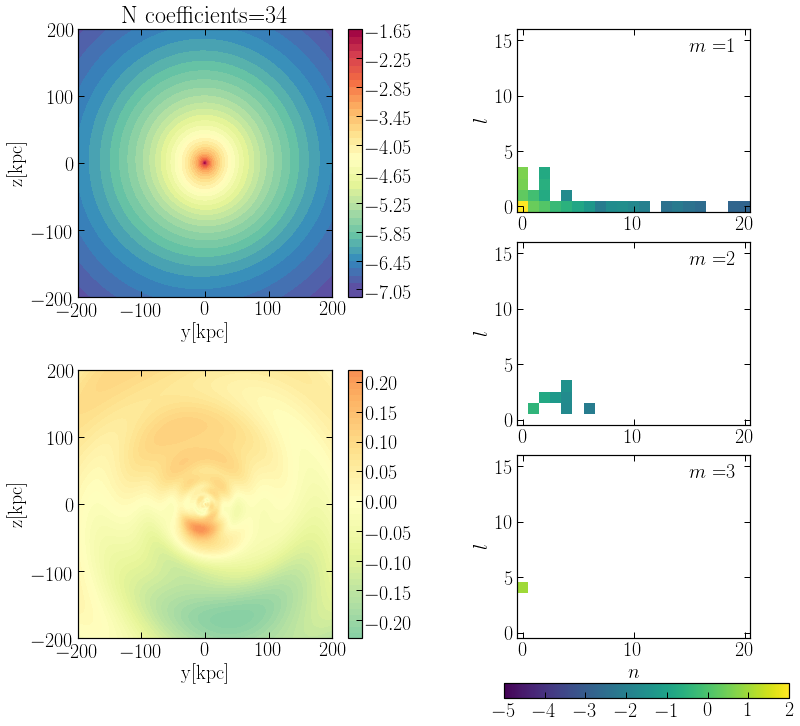

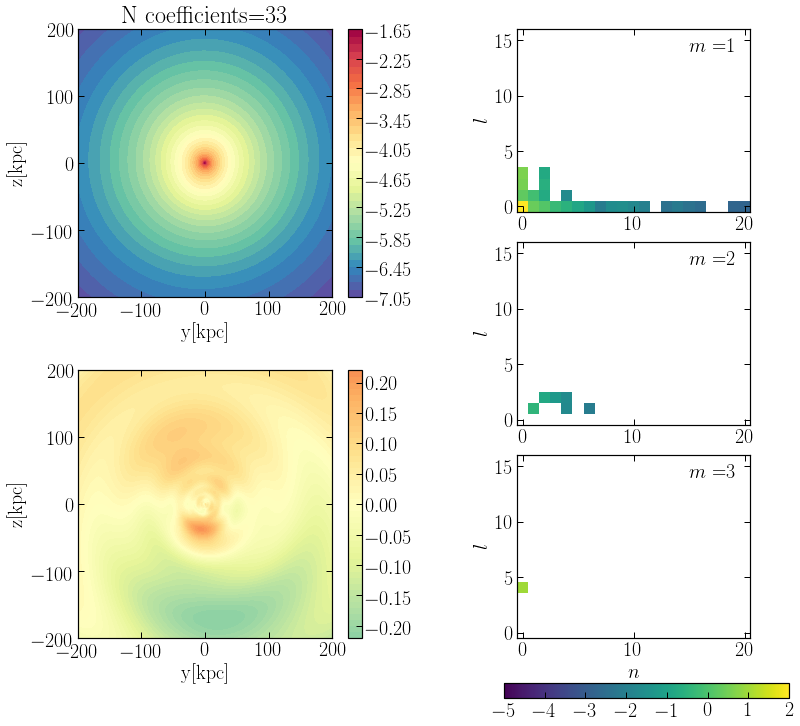

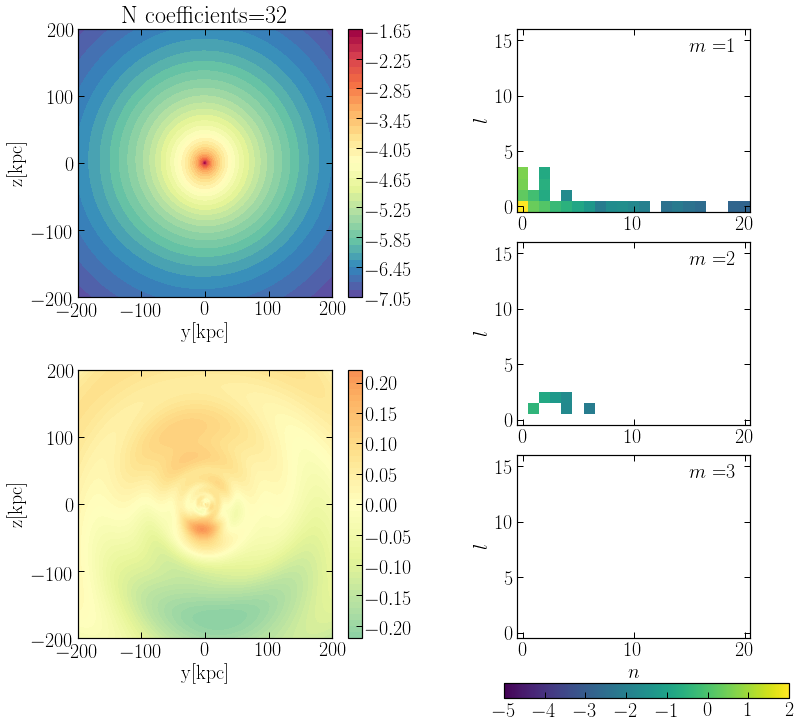

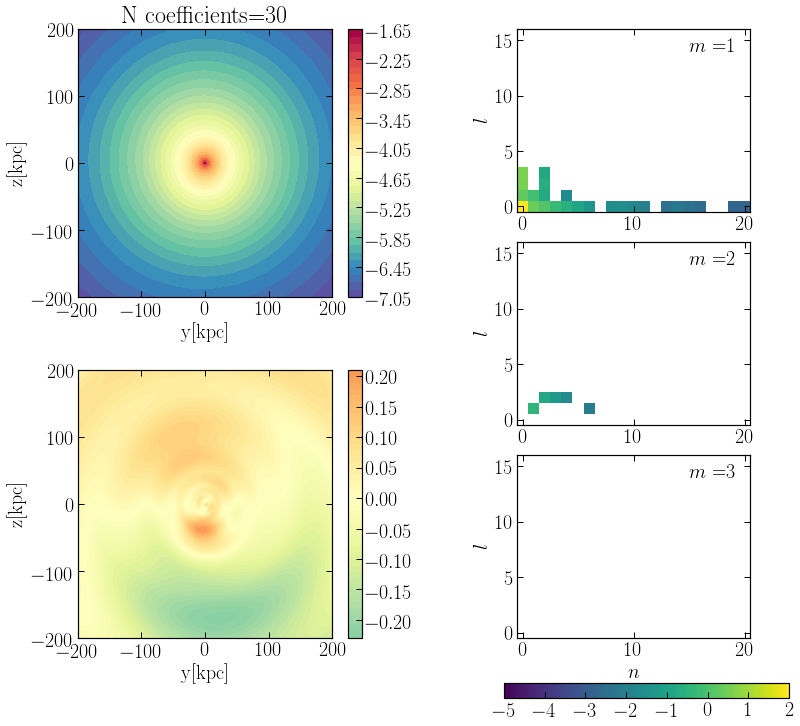

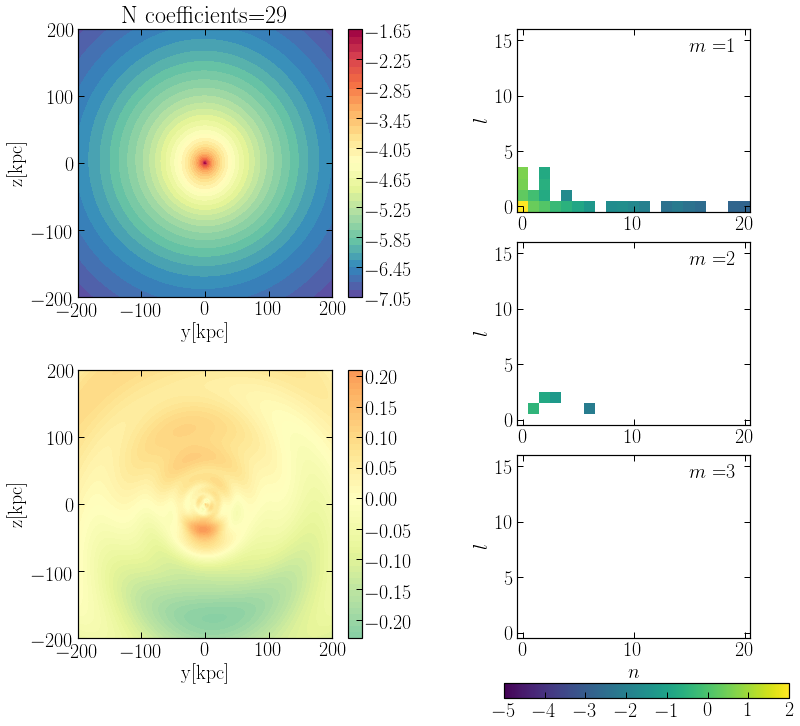

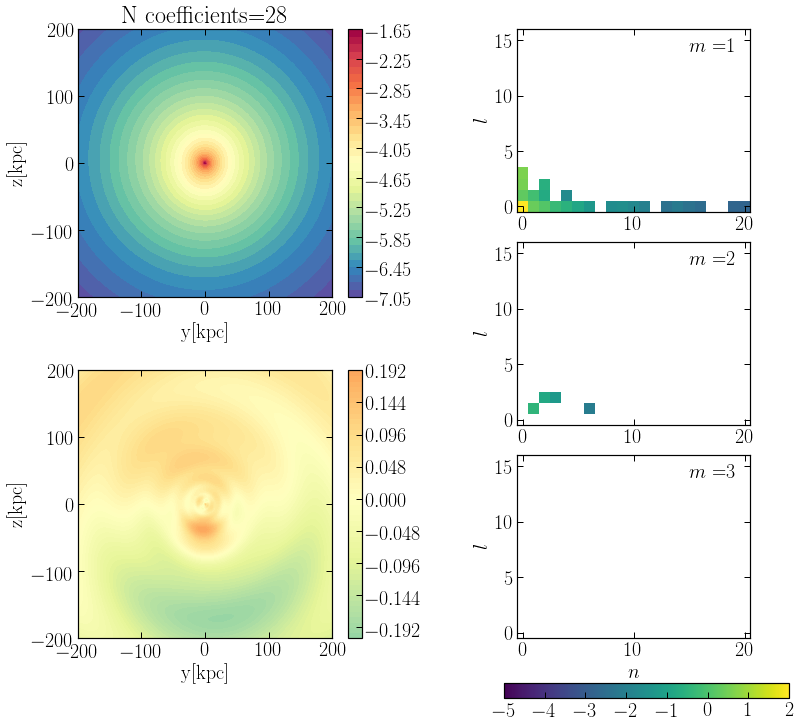

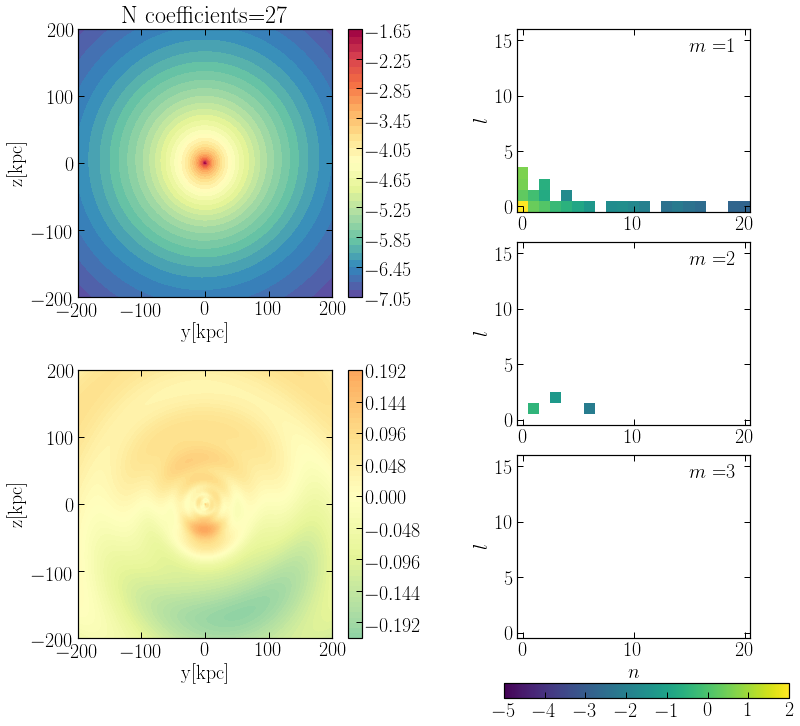

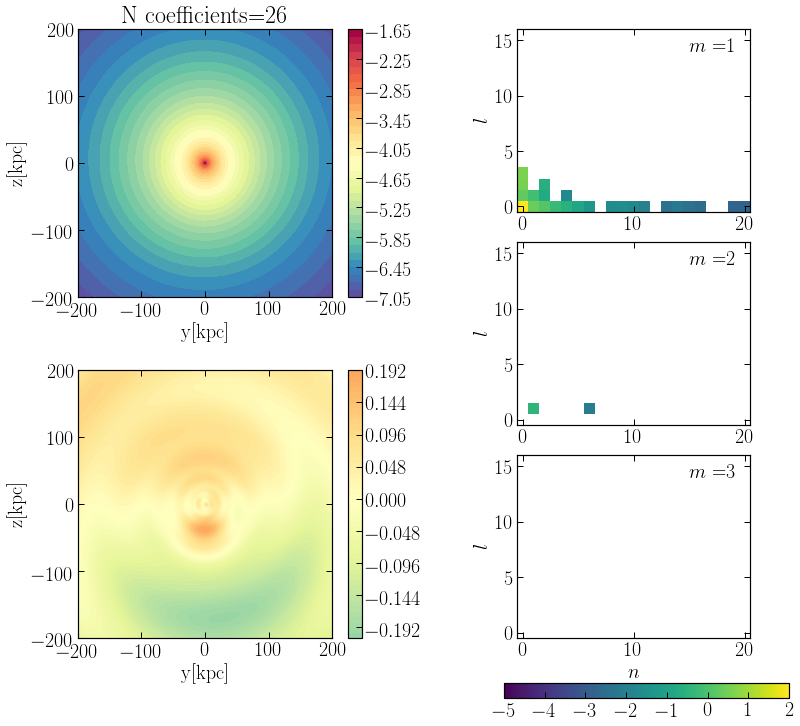

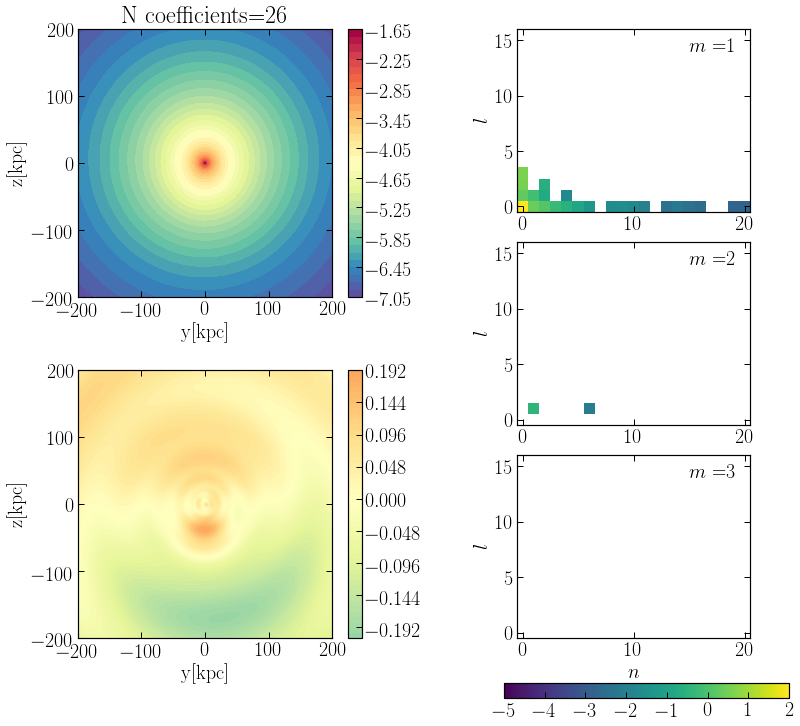

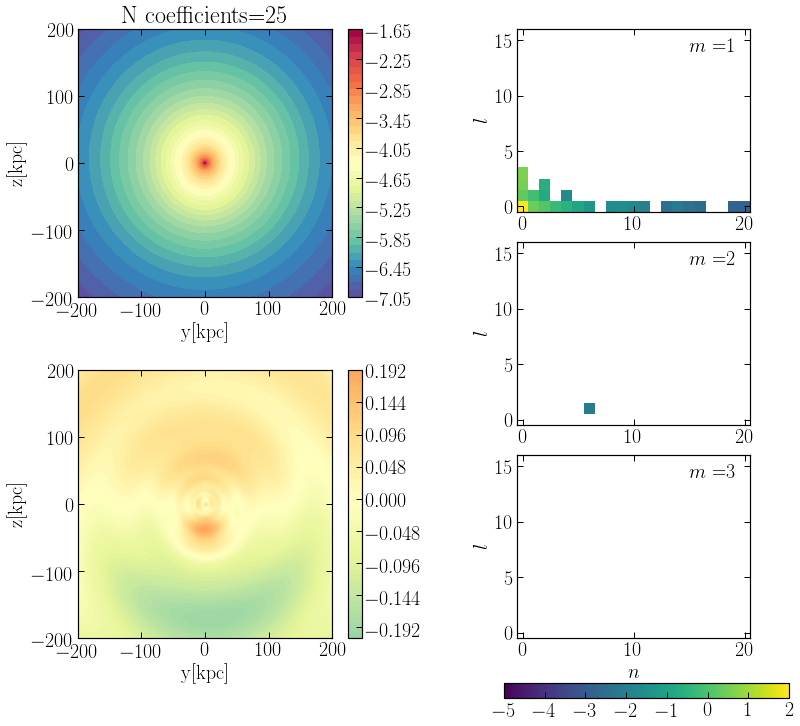

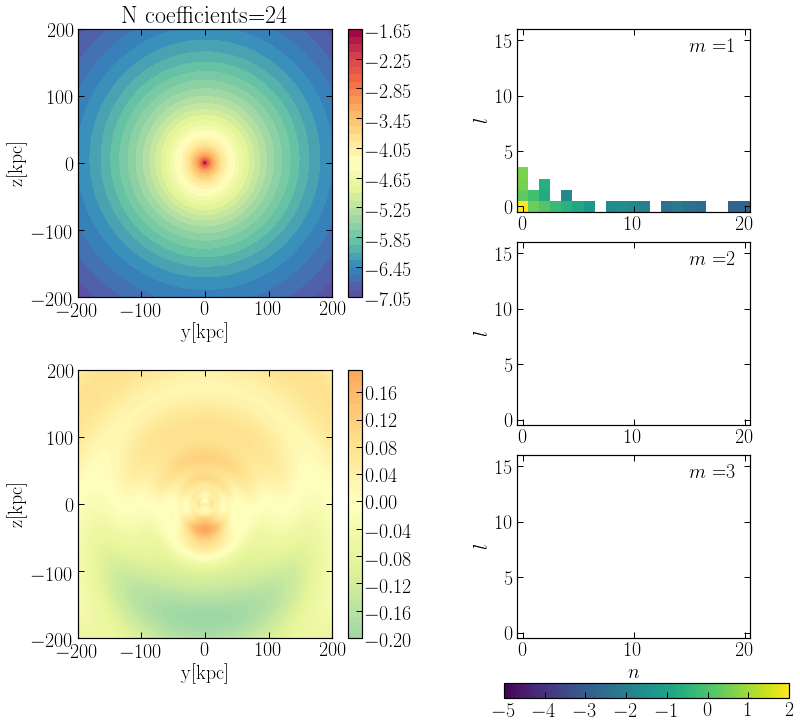

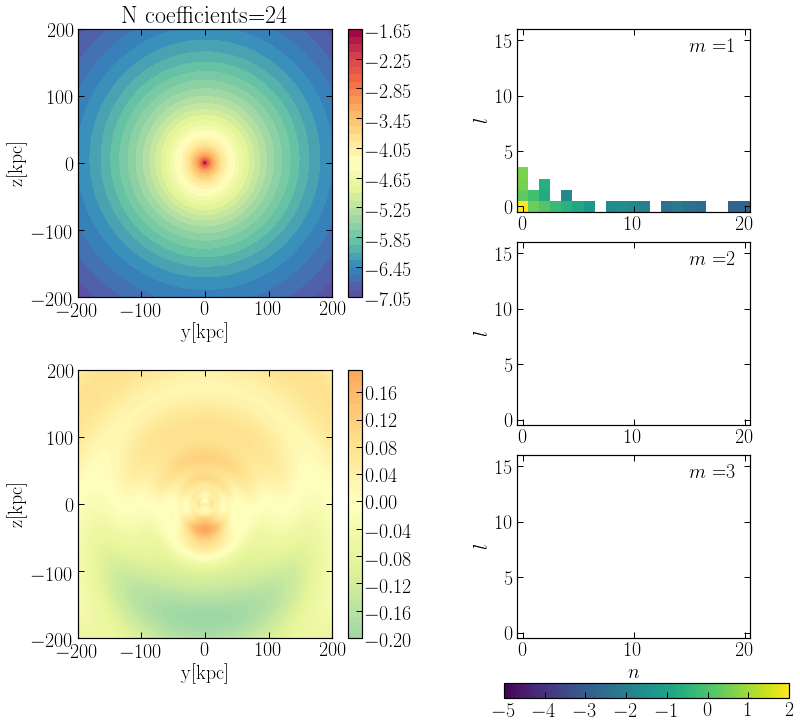

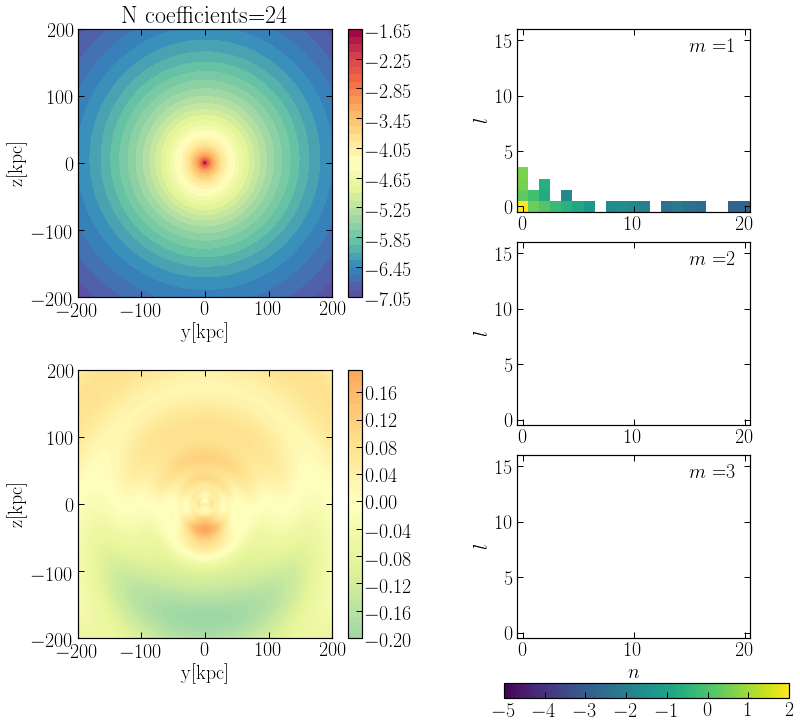

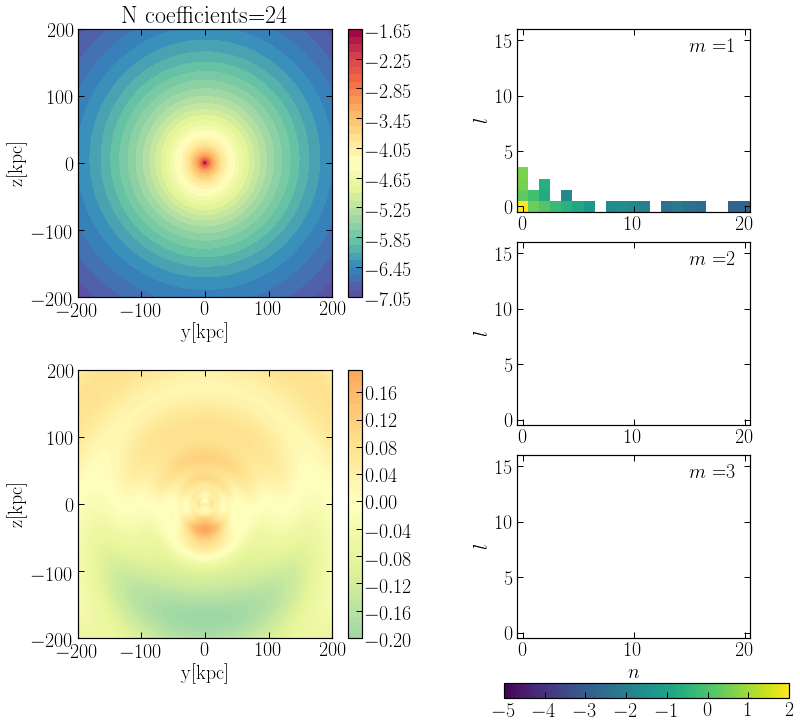

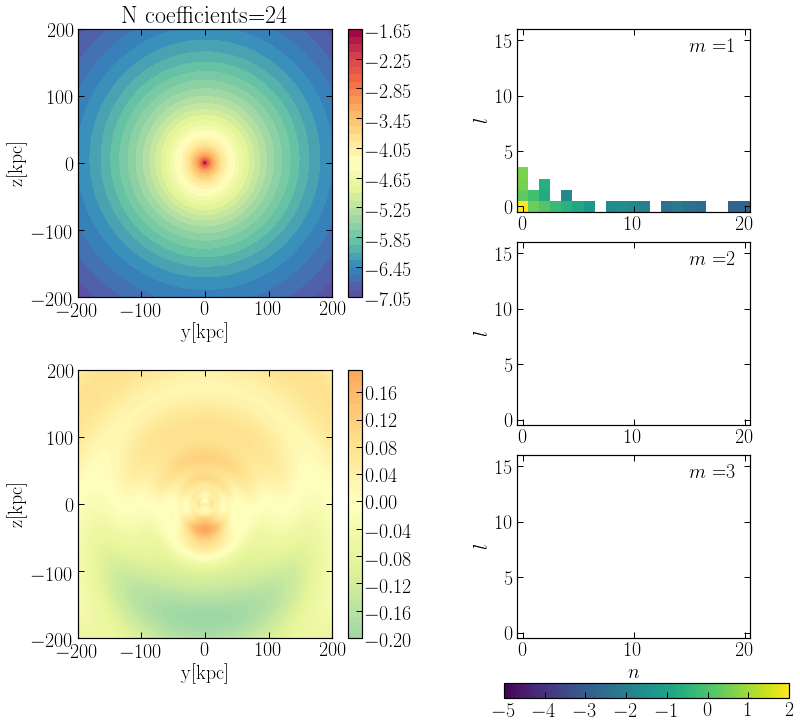

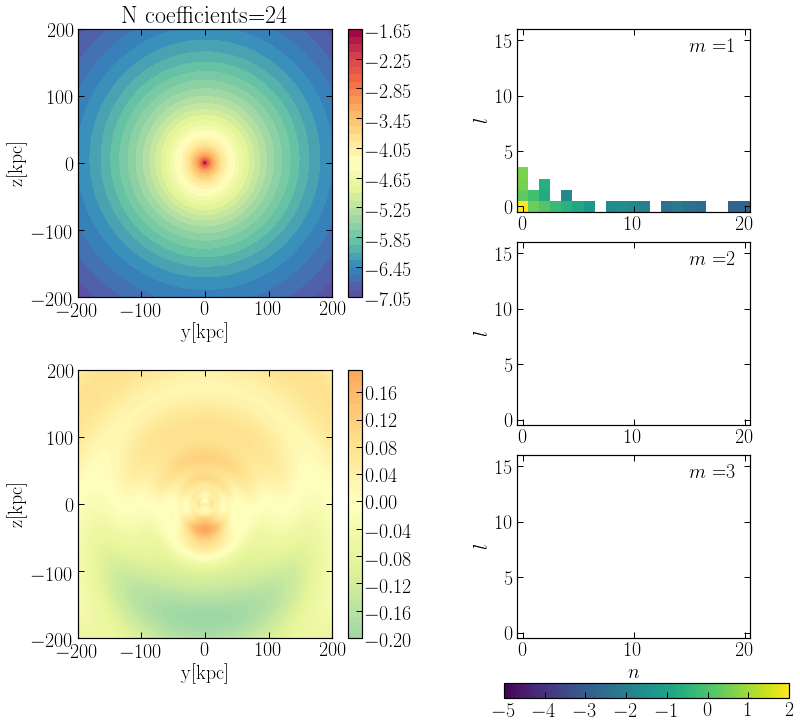

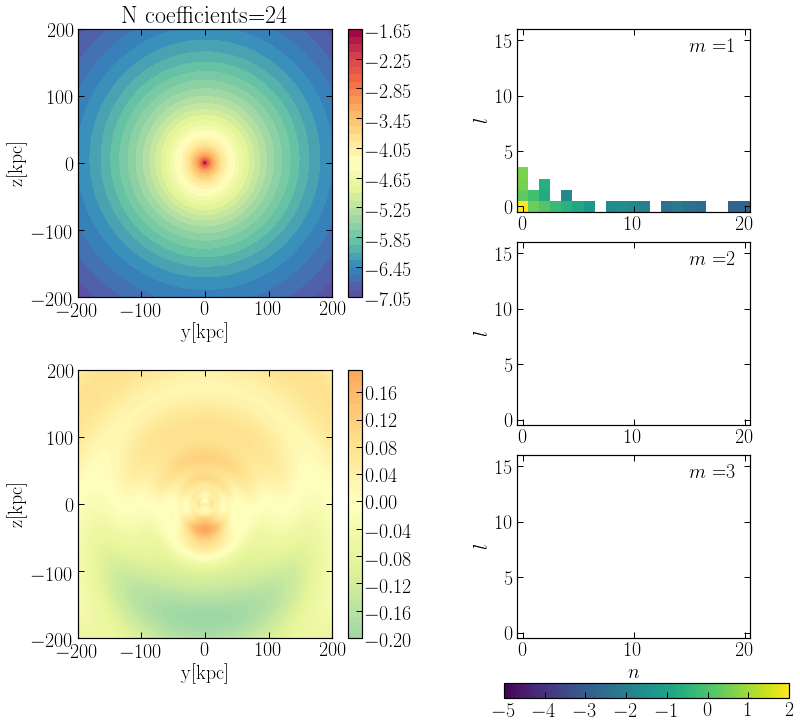

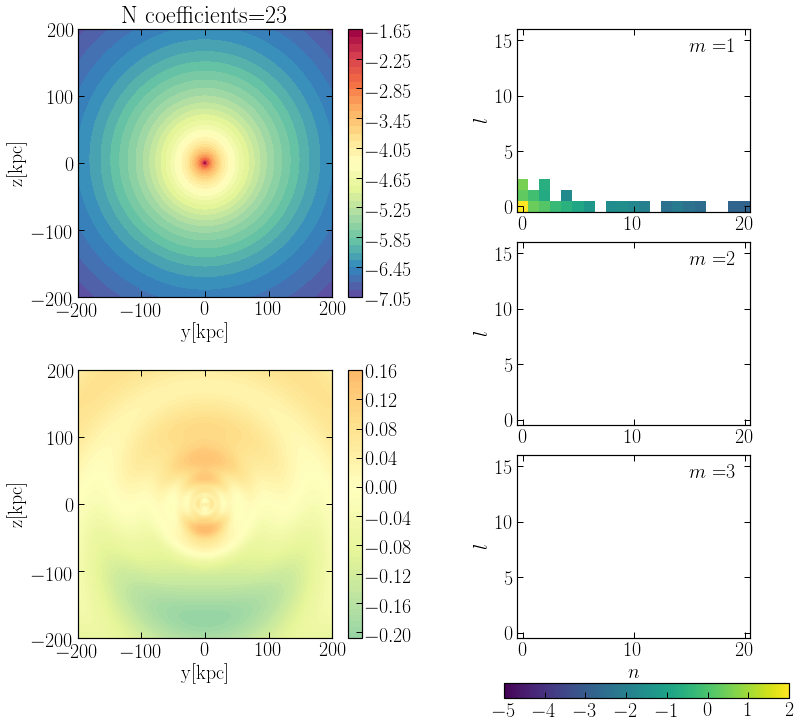

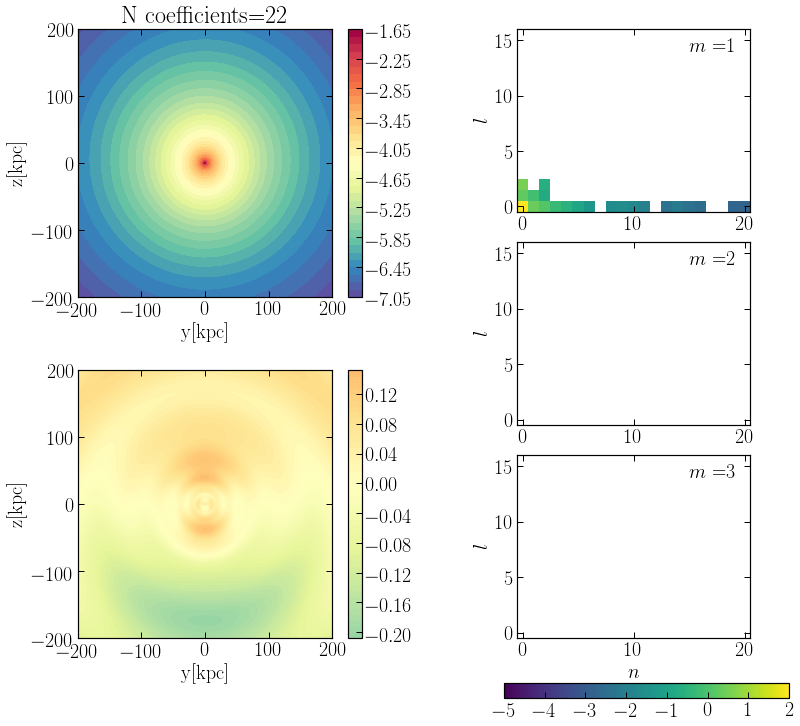

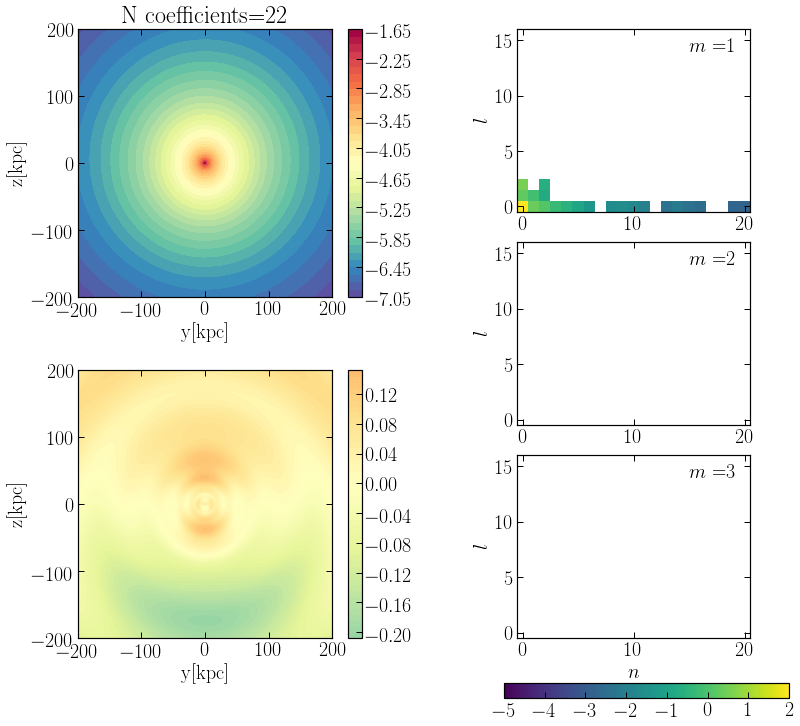

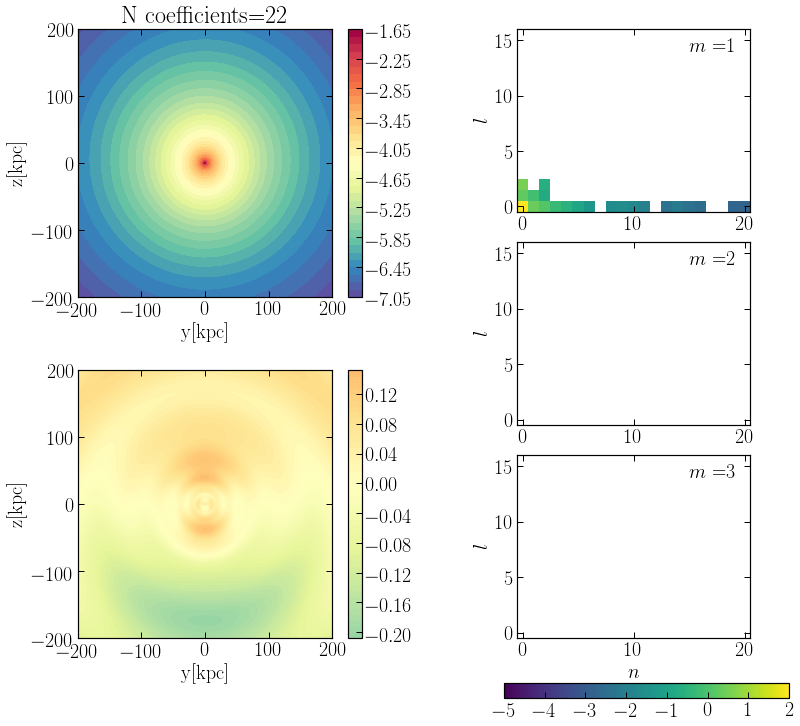

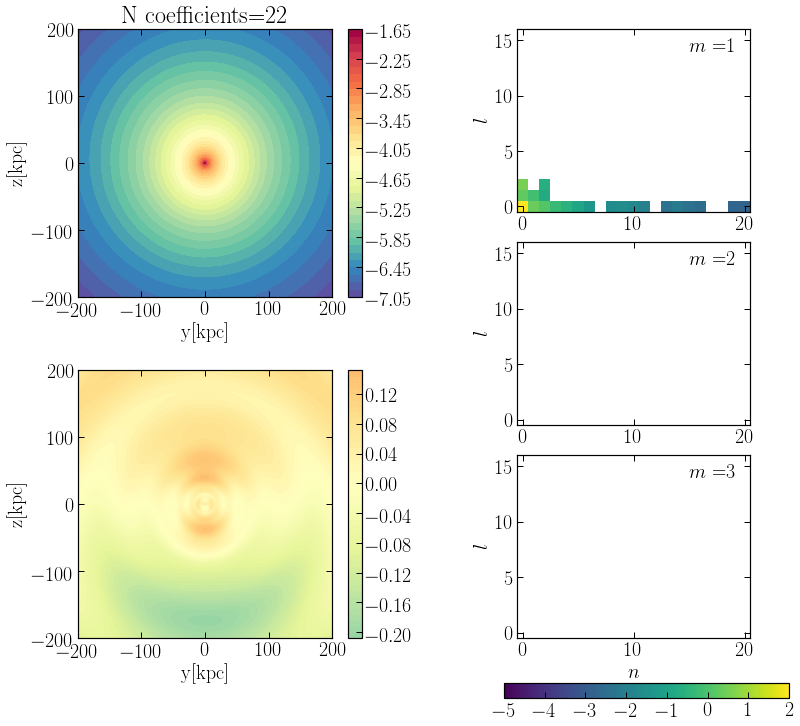

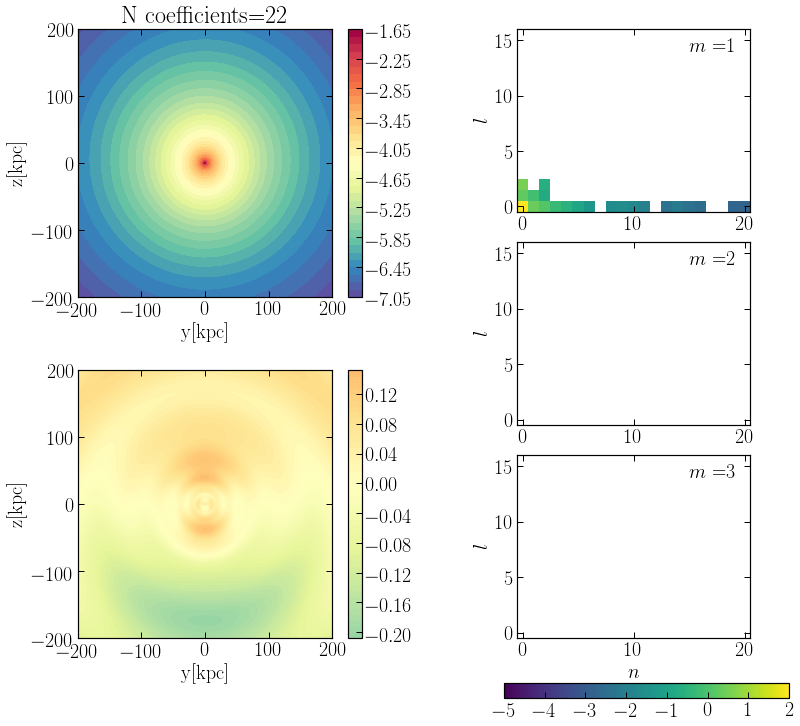

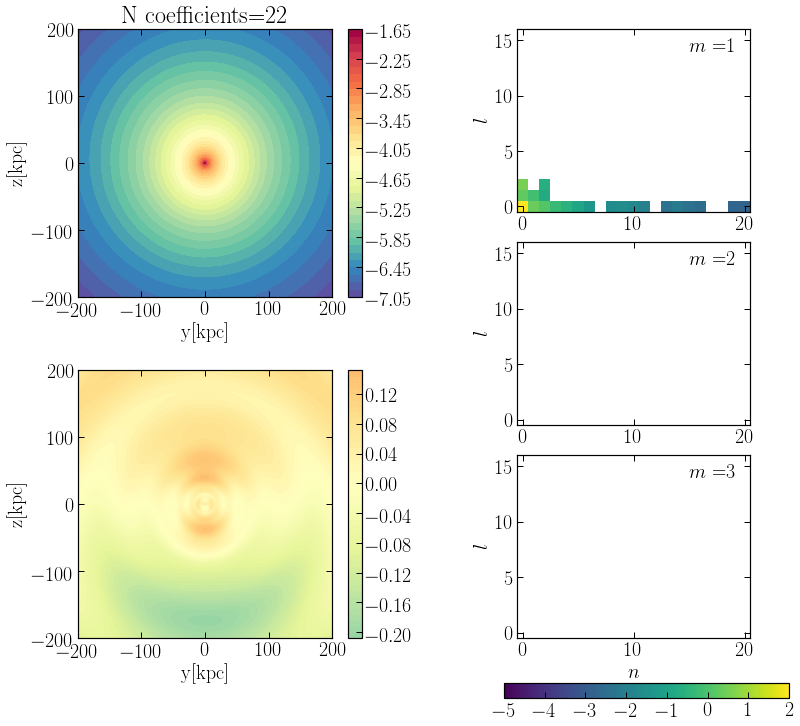

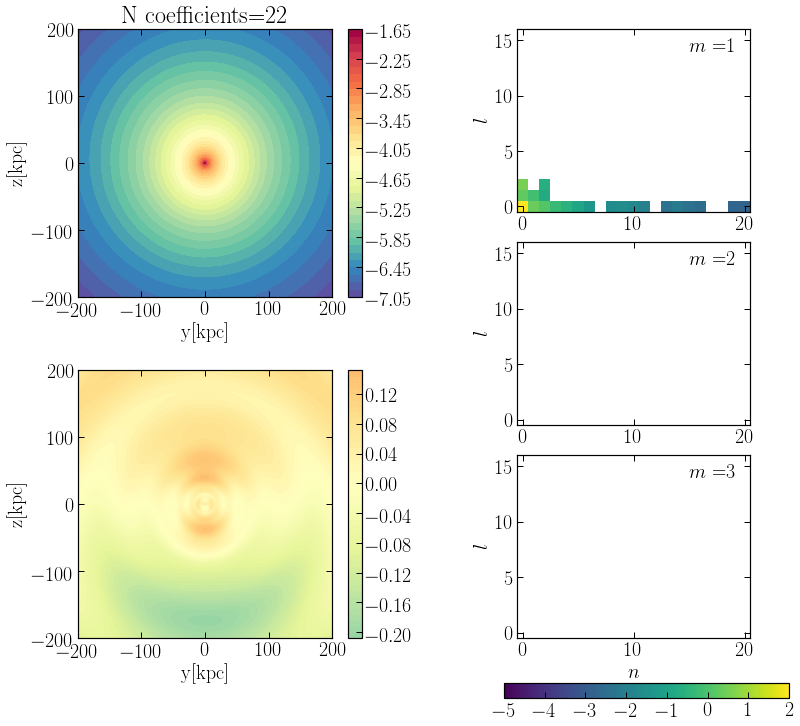

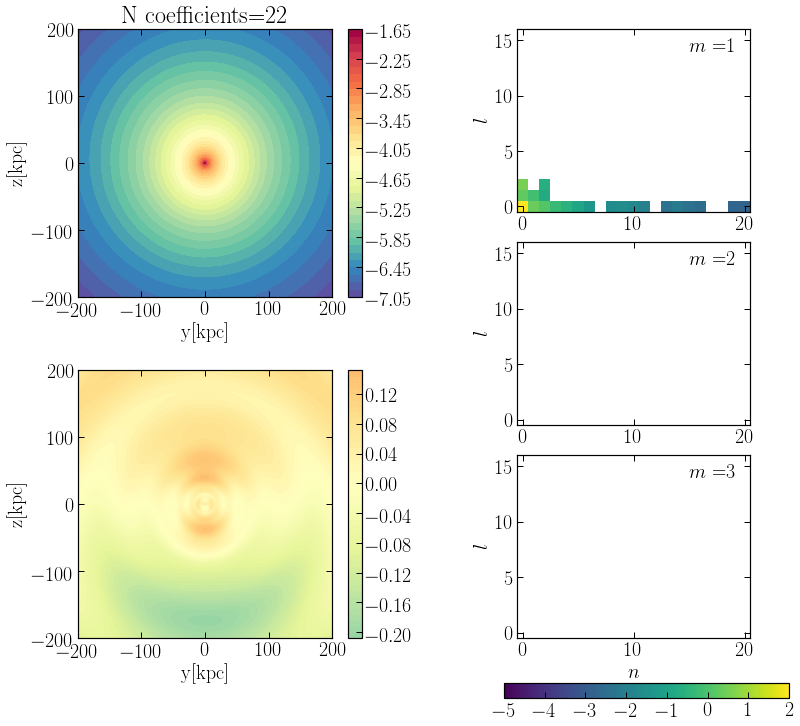

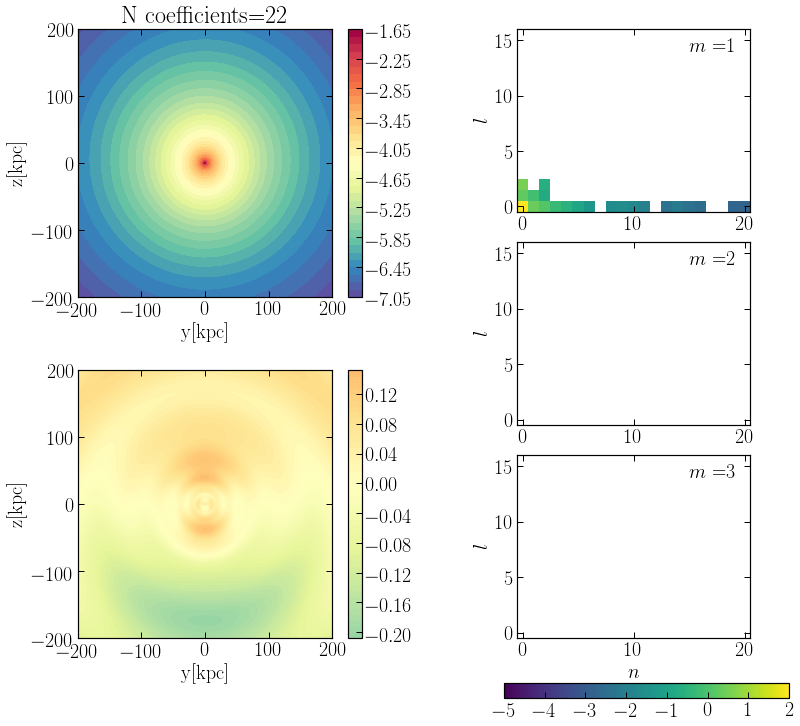

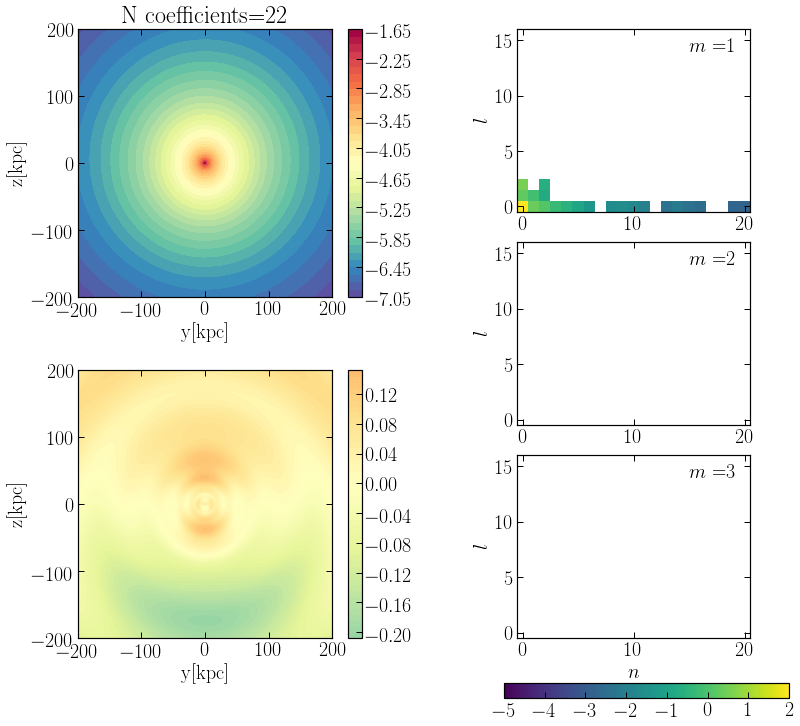

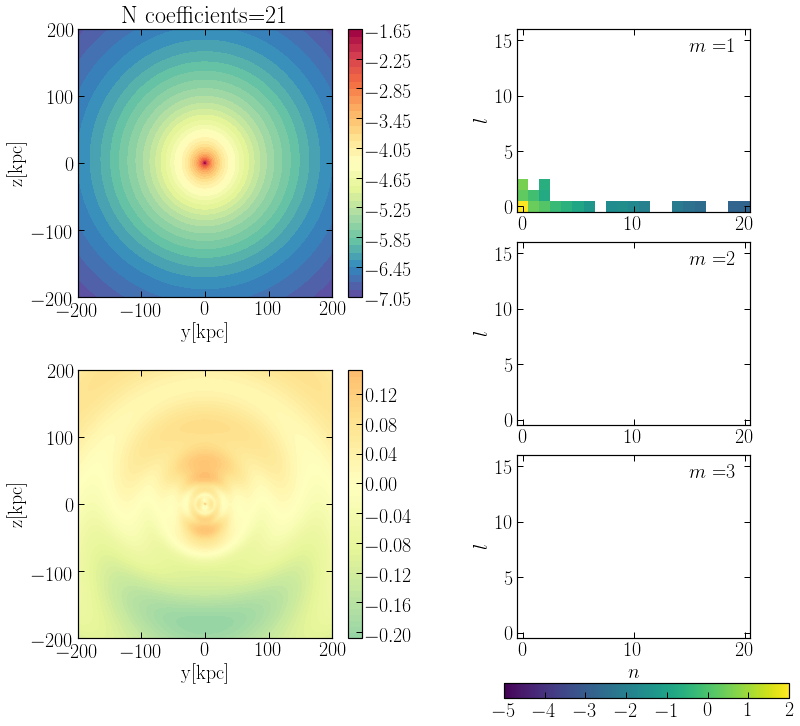

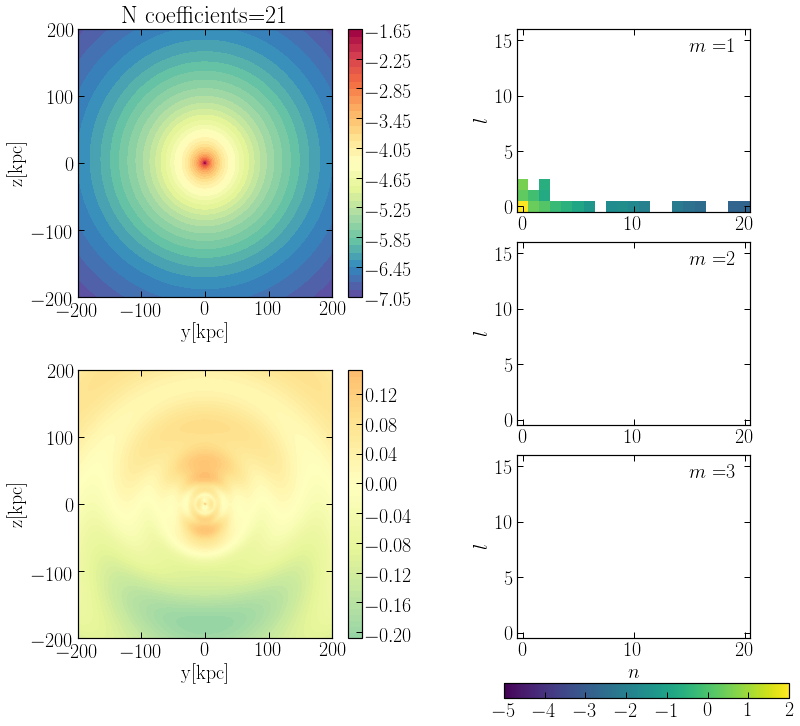

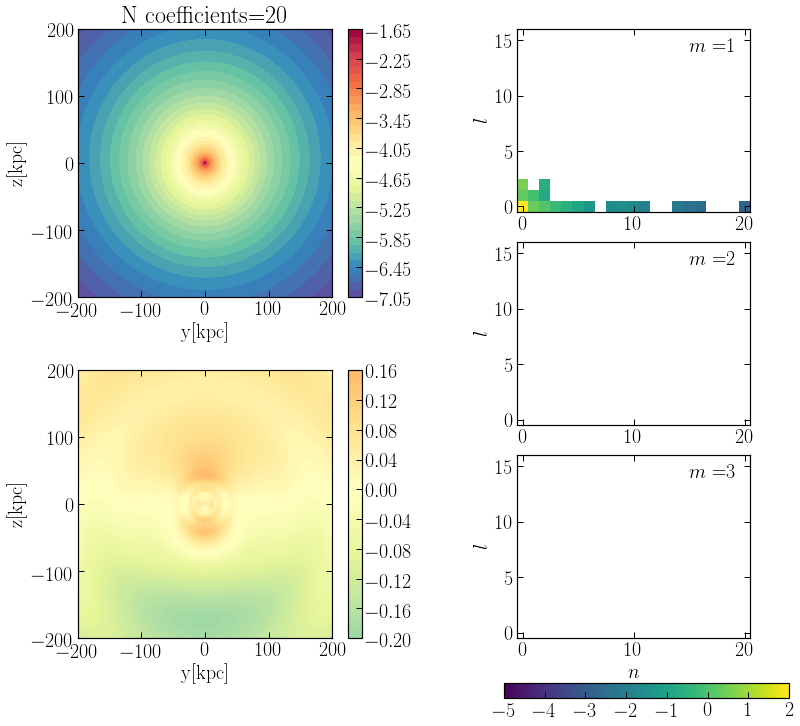

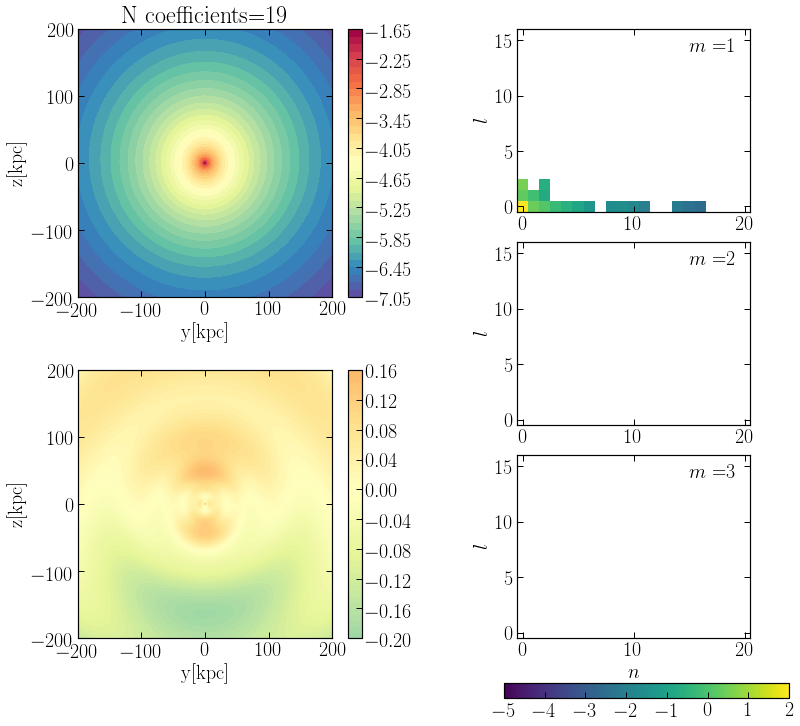

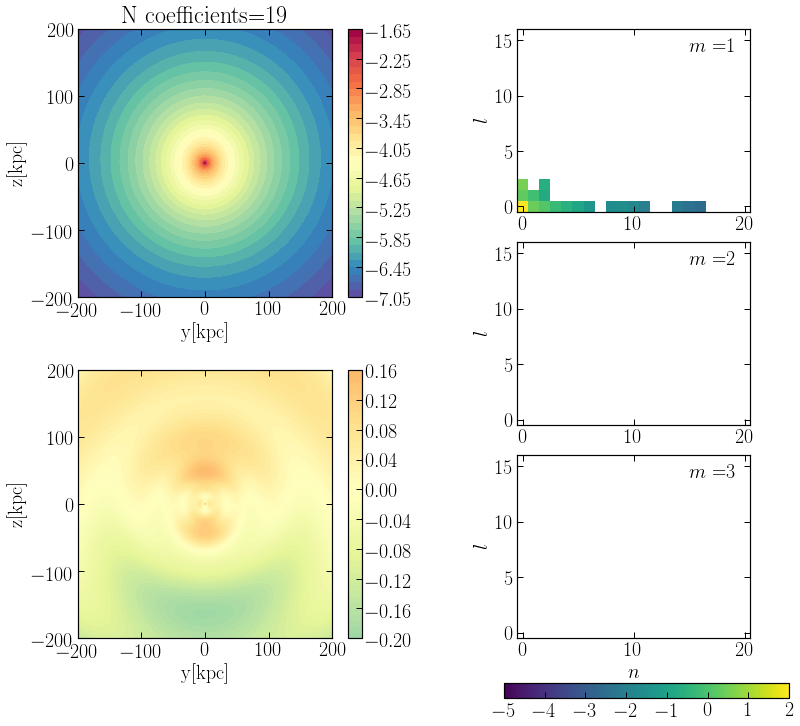

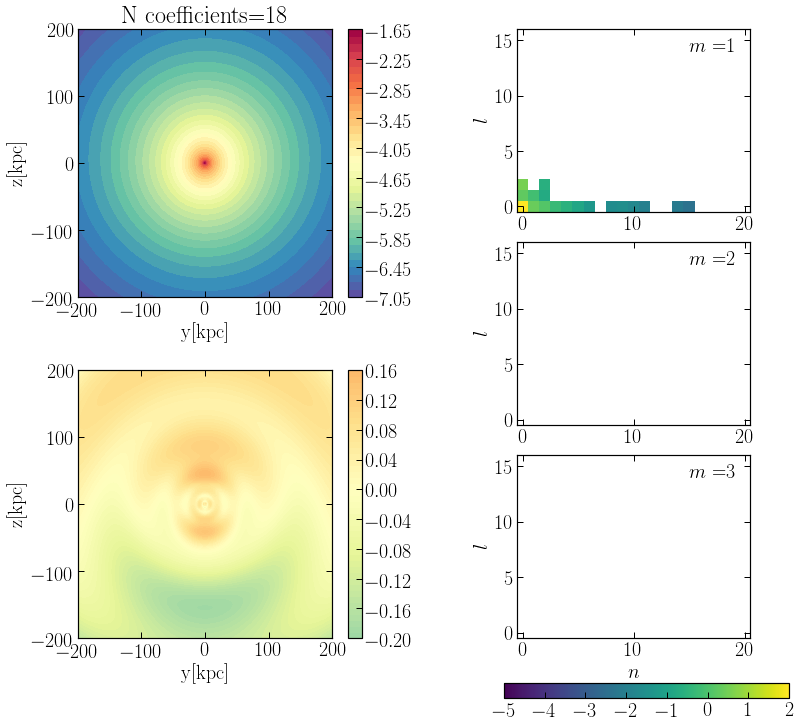

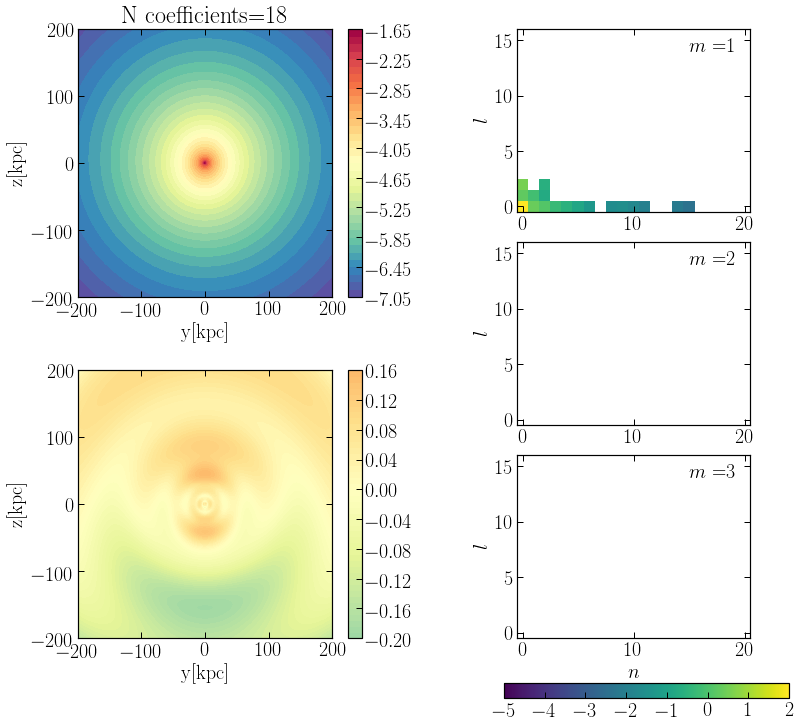

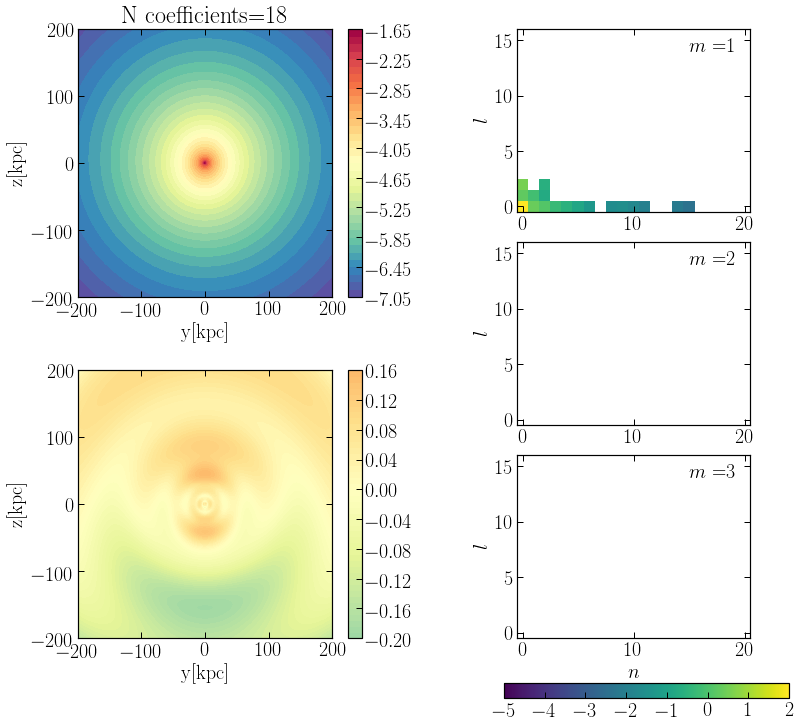

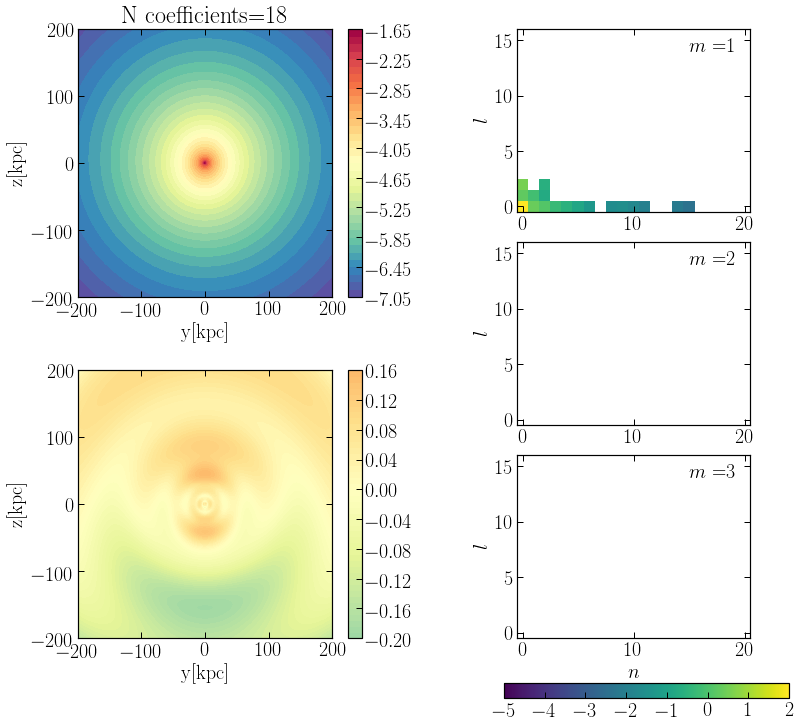

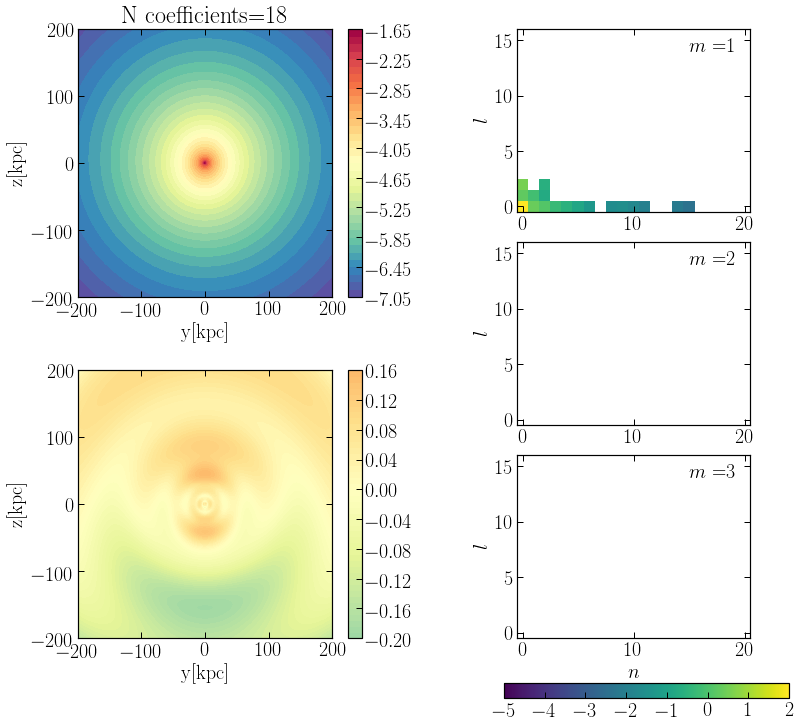

In [89]:
SN_cuts = np.linspace(0,100,60)
for i in range(len(SN_cuts)):
    mass = 1.577212515E-6 
    covmat_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_covmat_sample_'
    coeff_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_coeff_sample_'

    snap_n = 90
    S_mw, T_mw, N_mw, SN_out = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 10, 20, 20, 20, 
                                            SN_cuts[i], mass, snap=90, sn_out=1)
    fig_name = "summary_plot_sn_{:03d}.png".format(60-i)
    summary_figure(S_mw, T_mw, N_mw, np.sqrt(S_mw**2+T_mw**2), -5, 2, fig_name)
    

In [16]:
mass = 1.577212515E-6 
covmat_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_covmat_sample_'
coeff_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_coeff_sample_'

snap_n = 90
S_mw, T_mw, N_mw, SN_out = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 10, 20, 20, 20, 
                                        4, mass, snap=90, sn_out=1)
U_mw = np.zeros((21, 21, 21))
for i in range(21):
    U_mw[:,:,i] = ((S_mw[:,:,i]**2 + T_mw[:,:,i]**2)**0.5)/Anl_array(21, 21)
U_mw_a = ((S_mw**2 + T_mw**2)**0.5)/Anl_array(21, 21)

U_mw_norm = U_mw/np.sum(U_mw)
U_cut = np.linspace(-17, 0, 50)
print(N_mw)

270


../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [23]:
mass*81619663

128.73155395368246

In [30]:
np.sum(U_mw_a)/1E10

-502.93784754338566

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


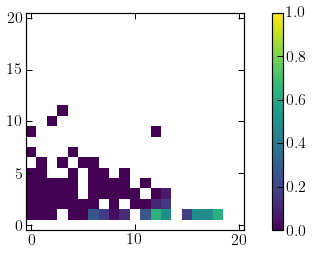

In [17]:
imshow(np.log10(np.abs(U_mw[:,:,1])).T, origin='lower', vmin=0, vmax=1)
colorbar()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


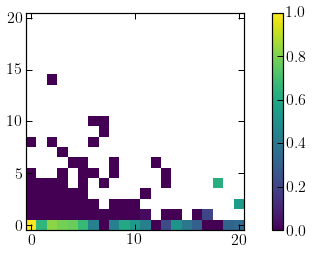

In [18]:
imshow(np.log10(np.abs(U_mw[:,:,0])).T, origin='lower', vmin=0, vmax=1)
colorbar()

In [331]:
np.log10(np.abs(U_mw[12, 1, 1]))

0.6477236378120931

In [43]:
len(U_cut)

50

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


270


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


270
269


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


269


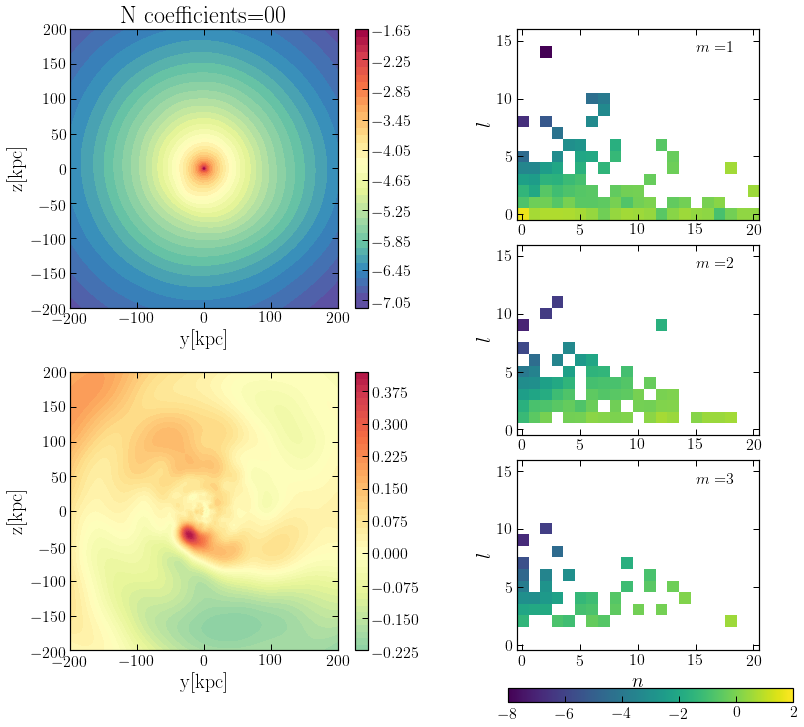

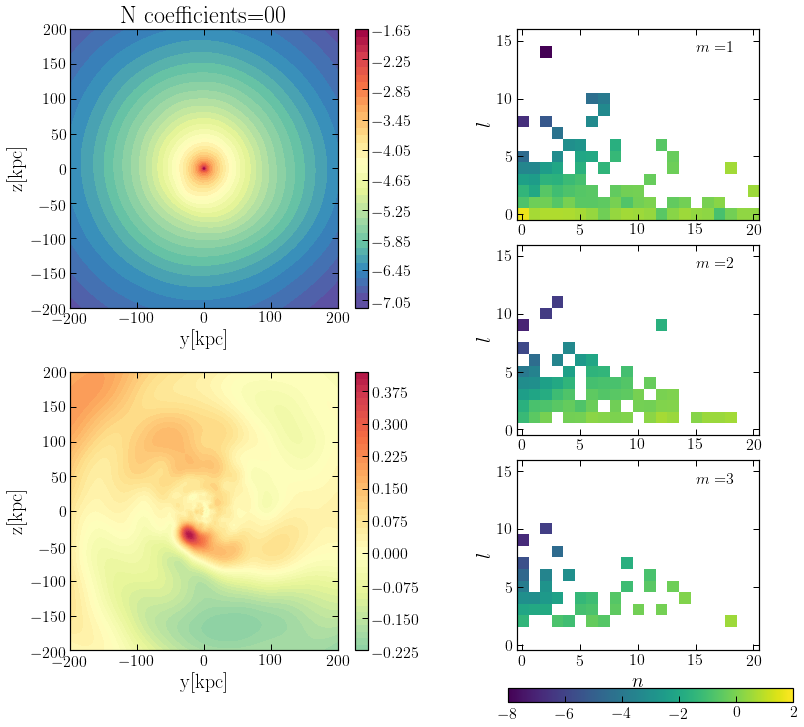

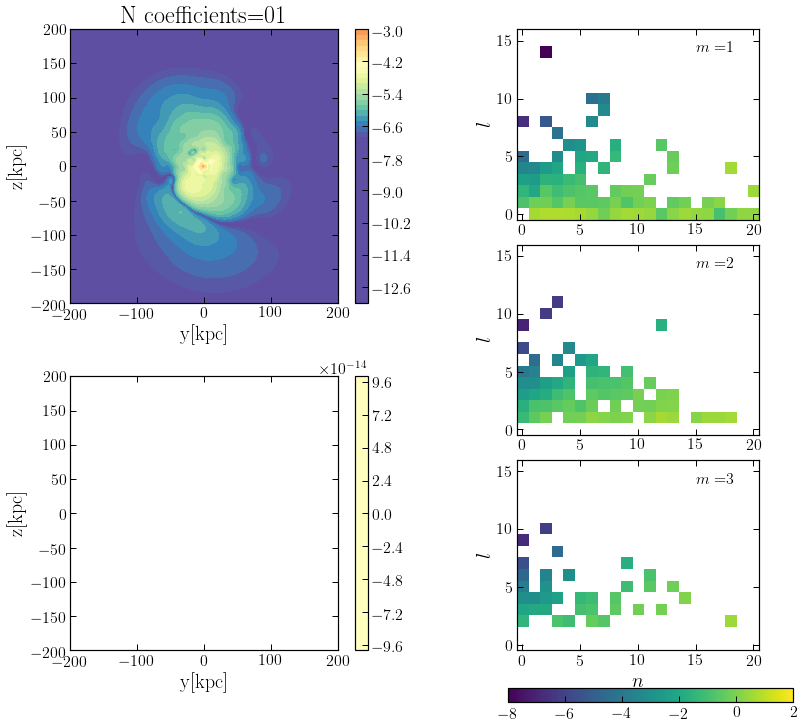

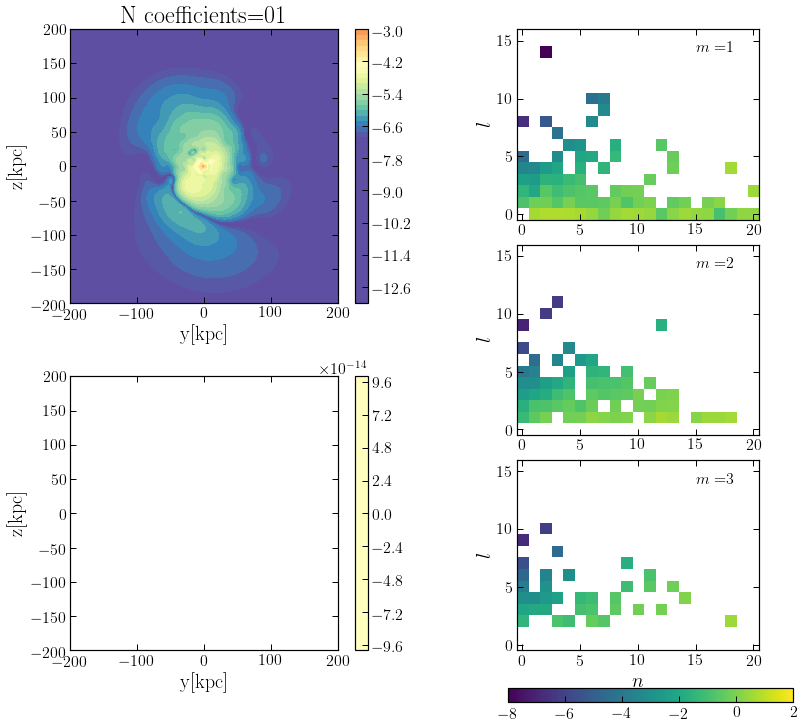

In [54]:
#for i in range(24, len(U_cut)):
for i in range(0, 4):

    index = np.where(np.log10(U_mw_norm)>=U_cut[-(i+1)])
    index2 = np.where(np.log10(U_mw_norm)<U_cut[-(i+1)])
    S_mw_copy = np.copy(S_mw)
    T_mw_copy = np.copy(T_mw)
    
    
    for j in range(len(index[0])):
        S_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
        T_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
    N_coeff = np.nonzero(S_mw_copy.flatten())
    print(len(N_coeff[0]))
    #S_mw_copy[0,0,0] = S_mw[0,0,0]
    #T_mw_copy[0,0,0] = T_mw[0,0,0]
        
    U_mw_c = np.zeros((21, 21, 21))
    for k in range(21):
        U_mw_c[:,:,k] = ((S_mw_copy[:,:,k]**2 + T_mw_copy[:,:,k]**2)**0.5)/Anl_array(21, 21)
        
    fig_name = "summary_plot_u_{:03d}_2.png".format(i)
    summary_figure(S_mw_copy, T_mw_copy, len(index[0]), np.abs(U_mw_c), -8, 2, fig_name)


In [1]:
np.max(np.log10(np.abs(U_mw_c)))

NameError: name 'np' is not defined

In [301]:
U_mw_norm = U_mw/np.sum(U_mw)
U_cut = np.linspace(-17, 0, 70)

for i in range(len(U_cut)):
    index1 = np.where(np.log10(U_mw_norm)>=U_cut[-(i+1)])
    index2 = np.where(np.log10(U_mw_norm)<U_cut[-(i+1)])
    print(U_cut[-(i+1)])
    #print(U_cut[-i])
    #print(len(nonzero(U_mw_norm[index].flatten())[0]))
    print('index1: ', len(index1[0]))
    print('index2: ', len(index2[0]))

0.0
index1:  0
index2:  9261
-0.2463768115942031
index1:  0
index2:  9261
-0.4927536231884062
index1:  0
index2:  9261
-0.7391304347826093
index1:  1
index2:  9260
-0.9855072463768124
index1:  1
index2:  9260
-1.2318840579710137
index1:  1
index2:  9260
-1.4782608695652169
index1:  2
index2:  9259
-1.72463768115942
index1:  11
index2:  9250
-1.971014492753623
index1:  24
index2:  9237
-2.217391304347826
index1:  35
index2:  9226
-2.4637681159420275
index1:  58
index2:  9203
-2.7101449275362306
index1:  68
index2:  9193
-2.9565217391304337
index1:  90
index2:  9171
-3.202898550724637
index1:  103
index2:  9158
-3.44927536231884
index1:  114
index2:  9147
-3.695652173913043
index1:  122
index2:  9139
-3.942028985507246
index1:  133
index2:  9128
-4.188405797101449
index1:  138
index2:  9123
-4.434782608695652
index1:  150
index2:  9111
-4.681159420289854
index1:  159
index2:  9102
-4.927536231884057
index1:  164
index2:  9097
-5.17391304347826
index1:  170
index2:  9091
-5.42028985507246

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [20]:
np.shape(U_mw)

(21, 21, 21)

In [21]:
np.shape(argsort(U_mw))

(21, 21, 21)

In [22]:
np.shape(argsort(U_mw))

(21, 21, 21)

In [23]:
np.min(U_mw)

-51.64791935206985

In [24]:
argmin(U_mw)

0

In [25]:
np.min(U_mw)

-51.64791935206985

In [33]:
## 
SN_out_clean = SN_out.flatten()[np.where(SN_out.flatten()!=0)]
U_mw_clean = U_mw.flatten()[np.where(U_mw.flatten()!=0)]
A_nlm_clean = (((S_mw)**2+(T_mw)**2)**0.5).flatten()[np.where((((S_mw)**2+(T_mw)**2)**0.5).flatten()!=0)]

Text(0,0.5,'N coefficients')

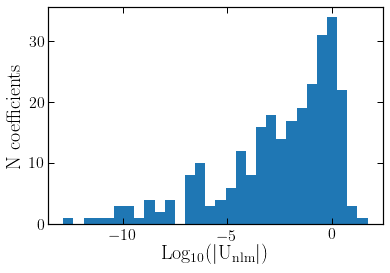

In [34]:
index = np.where(U_mw.flatten()!=0)
hist(np.ma.log10(np.abs(U_mw_clean)), bins=30, color='C0')
xlabel(r'$\rm{Log_{10}}(|U_{nlm}|)$')
ylabel('N coefficients')

Text(0,0.5,'N coefficients')

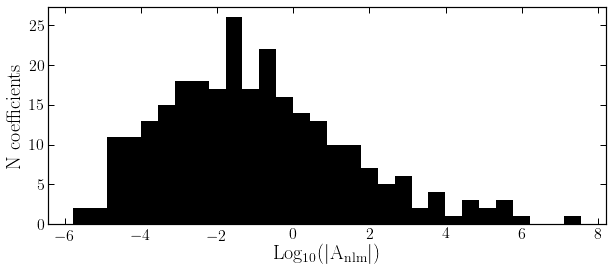

In [28]:
hist(np.ma.log10(np.abs(A_nlm_clean)), bins=30, color='k')
xlabel(r'$\rm{Log_{10}}(|A_{nlm}|)$')
ylabel('N coefficients')

## How the total energy, amplitude and S/N in the coefficients  increases as we use more and more coefficients.

In [35]:
U_mw_sort = U_mw_clean[np.argsort(U_mw_clean)]
U_cumulative = np.zeros(len(U_mw_sort))
for i in range(len(U_mw_sort)):
    U_cumulative[i] = np.sum(U_mw_sort[:i]) 
    
# Ncoeff 
A_mw_sort = (A_nlm_clean[np.argsort(A_nlm_clean)])[::-1]
A_cumulative = np.zeros(len(A_nlm_clean))
for i in range(len(A_nlm_clean)):
    A_cumulative[i] = np.sum(A_mw_sort[:-(i+1)]) 
    
SN_mw_sort = (SN_out_clean[np.argsort(SN_out_clean)])[::-1]
SN_cumulative = np.zeros(len(SN_out_clean))
for i in range(len(SN_out_clean)):
    SN_cumulative[i] = np.sum(SN_mw_sort[:-(i+1)]) 

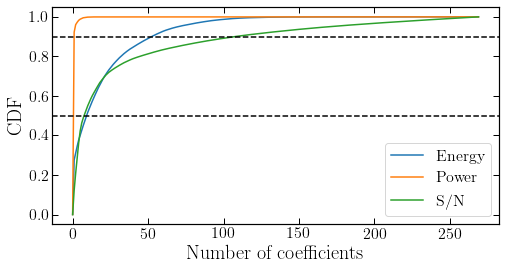

In [39]:
figsize(8, 4)
plot(np.arange(0, len(U_mw_sort)), np.abs(U_cumulative)/np.abs(U_cumulative)[-1], label='Energy')
plot(np.arange(0, len(A_mw_sort))[::-1], (np.abs(A_cumulative))/np.abs(A_cumulative)[0], label='Power')
plot(np.arange(0, len(A_mw_sort))[::-1], SN_cumulative/SN_cumulative[0],  label='S/N')

legend()
axhline(0.9, c='k', ls='--')
axhline(0.5, c='k', ls='--')

xlabel('Number of coefficients')
ylabel('CDF')
savefig('cdf_all.pdf', bbox_inches='tight')

In [31]:
## Which are the coefficients that contribute 50% to the energy, amplitude, and S/N

In [32]:
U_mw_sort[:50]

array([-51.64791935,  -6.68951484,  -6.18966569,  -5.91547669,
        -4.66211533,  -4.56129895,  -4.44348417,  -4.27637454,
        -4.26002771,  -4.02865343,  -3.57958283,  -3.47870482,
        -3.42569054,  -3.30353206,  -3.13270929,  -3.10632464,
        -3.07613902,  -2.7371598 ,  -2.72258074,  -2.71671538,
        -2.49844417,  -2.20271428,  -2.09098783,  -2.04937606,
        -1.85062832,  -1.83514829,  -1.70341192,  -1.61117669,
        -1.52122503,  -1.50970239,  -1.44640534,  -1.31855693,
        -1.28949189,  -1.27213029,  -1.18035586,  -1.09058317,
        -1.07397697,  -0.97881032,  -0.90739115,  -0.90072941,
        -0.88215542,  -0.88213361,  -0.86437703,  -0.84741443,
        -0.83237951,  -0.82859284,  -0.82264489,  -0.77383095,
        -0.7732403 ,  -0.76279686])

In [33]:
SN_mw_sort[:50]

array([1138.76975835,  800.25759106,  715.67928503,  709.74296952,
        561.44888655,  365.4927729 ,  239.25877426,  196.49109516,
        195.00446636,  185.89772037,  165.46895604,  159.484549  ,
        145.58319666,  129.51774009,  126.51268112,  122.51379832,
        121.8077162 ,  115.87594812,   91.94599088,   89.33678247,
         86.85265145,   83.67080149,   67.52737057,   65.75288126,
         53.51482861,   51.15208844,   48.95708038,   46.24494285,
         44.87582674,   43.07703125,   41.70196744,   41.06044524,
         39.21116923,   38.45508186,   34.84043135,   32.75035234,
         32.25415956,   32.10467343,   31.09224198,   27.79789017,
         25.56781315,   25.0560667 ,   24.13857805,   23.61679887,
         22.50155307,   22.26254608,   21.69148594,   21.54824105,
         21.50050429,   21.10797861])

In [34]:
index_more_energetic = np.where(U_mw<U_mw_sort[10])
index_more_SN = np.where(SN_out>SN_mw_sort[1])

In [35]:
index_more_energetic

(array([ 0,  1,  2,  3,  4,  5,  9, 12, 18, 18]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 4]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0]))

In [36]:
index_more_SN

(array([2]), array([0]), array([0]))

In [37]:
print(np.sum(U_mw)/2.)
print(np.sum(U_mw_sort[:9]))


-93.48346070224724
-92.64587728043261


In [38]:
## What does the first coefficients in the radial expansion look like? 

In [39]:
from scipy.special import gegenbauer, eval_gegenbauer

In [40]:
def Knl(n, l):
    K = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    return K

def rho_nlm(r, n, l):
    Cnl = eval_gegenbauer(n, 2*l+3/2., (r-1)/(r+1), out=None)
    rho = np.sqrt(4*np.pi)*r**l / (r*(1+r)**(2*l+3)) * Cnl
    return rho*Cnl

In [523]:
np.log10(300/r_s)

0.8659291938512281

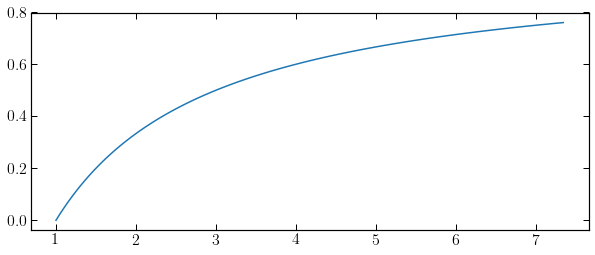

In [45]:
r_s = 40.85
r_halo = np.logspace(0, np.log10(300/r_s), 100)
n = 0
l = 0
plot(r_halo, (r_halo-1)/(r_halo+1))

Text(0,0.5,'$\\rho$')

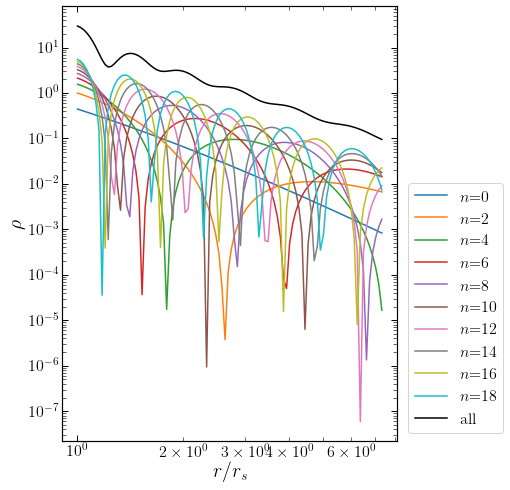

In [46]:
rho_total = np.zeros(100)
figure(figsize=(6, 8))
for n in range(0, 20, 2):
    rho = rho_nlm(r_halo, n, 0)
    rho_total += rho
    semilogy(r_halo, rho, label='$n$={}'.format(n))
loglog(r_halo, rho_total, label='all', c='k')

legend(loc='lower left', bbox_to_anchor= (1.01, 0))
#xlim(3, 200)
xlabel('$r/r_s$')
ylabel(r'$\rho$')

In [47]:
def rho_nlm_grid(npoints, n, l):
    rho = np.zeros((npoints, npoints))
    for j in range(npoints):
        for i in range(npoints):
            x = (i+npoints/2.)-npoints
            y = (j+npoints/2.)-npoints
            rho[i][j] = rho_nlm(np.sqrt(x**2+y**2)/r_s, n, l)
    return rho

In [48]:
n_n = 20
npoints = 400
rho_all = np.zeros((n_n, npoints, npoints))
for i in range(n_n):
    rho_all[i] = rho_nlm_grid(npoints, i, 0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


4 5


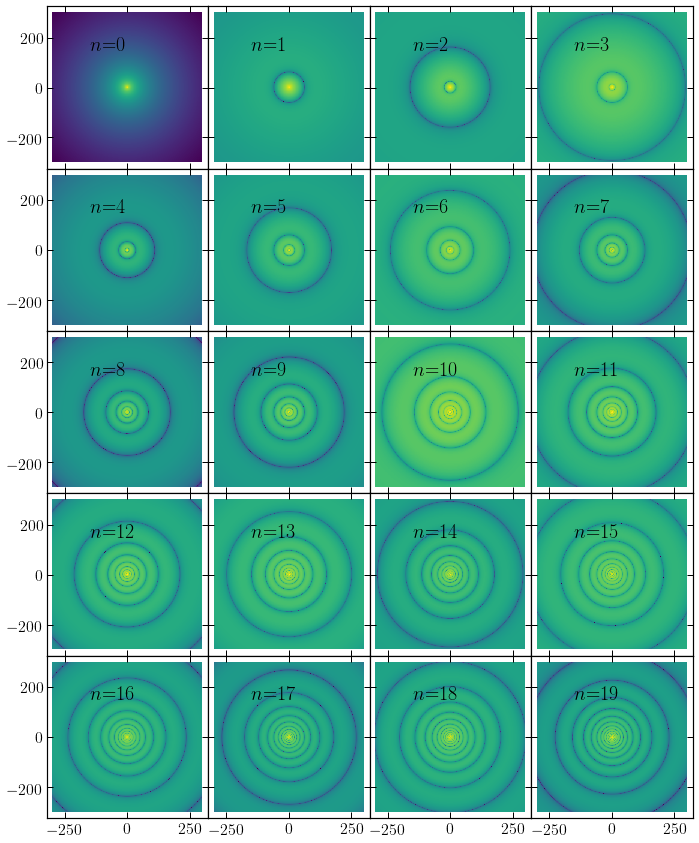

In [56]:
ncols=4
nrows = int(n_n/ncols)
print(ncols, nrows)
fig, ax = subplots(nrows, ncols, figsize=(10, 12), sharex=True, sharey=True)

n_i=0
for i in range(nrows):
    for j in range(ncols):
        ax[i][j].imshow(np.log10(rho_all[n_i]), extent=[-300, 300, -300, 300])
        ax[i][j].text(-150, 150, '$n$={}'.format(n_i), fontsize=20)
        n_i += 1


fig.tight_layout()
subplots_adjust(wspace=0.0, hspace=0)

savefig('all_radial.pdf', bbox_inches='tight')

In [50]:
n_best = [0,  1,  2,  3,  4,  5]
rho_sum = np.zeros((npoints, npoints))
for i in n_best:
    print(i)
    rho_sum += rho_all[i]
    

0
1
2
3
4
5


In [51]:
rho_profile = np.zeros(100)
for n in n_best:
    rho = rho_nlm(r_halo, n, 0)
    rho_profile += rho

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


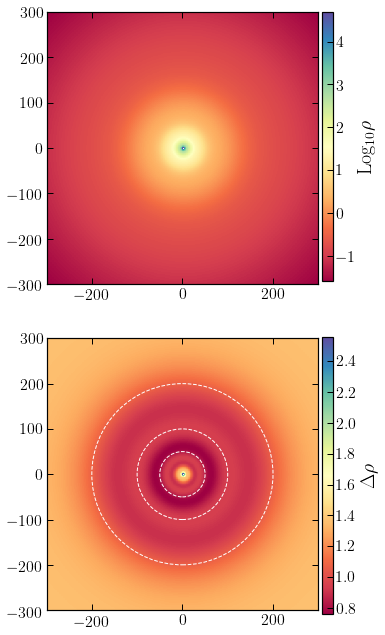

In [54]:
circle1=plt.Circle((0, 0), 50, color='w', fill=False, ls='--')
circle2=plt.Circle((0, 0), 100, color='w', fill=False, ls='--')
circle3=plt.Circle((0, 0), 200, color='w', fill=False, ls='--')


fig, ax = subplots(2,1, figsize=(5, 11))
im1 = ax[0].imshow(np.log10(rho_sum), extent=[-300, 300, -300, 300], cmap='Spectral')
im2 = ax[1].imshow(np.log10(rho_sum/rho_all[0]-1), extent=[-300, 300, -300, 300], cmap='Spectral')

ax[1].add_artist(circle1)
ax[1].add_artist(circle2)
ax[1].add_artist(circle3)


cbar_ax1 = fig.add_axes([0.9, 0.54, 0.03, 0.34])
cbar_ax2 = fig.add_axes([0.9, 0.12, 0.03, 0.35])

cbar1 = fig.colorbar(im1, cax = cbar_ax1)
cbar2 = fig.colorbar(im2, cax = cbar_ax2)
cbar1.set_label(r'$\rm{Log_{10}\rho}$')
cbar2.set_label(r'$\rm{\Delta \rho}$')

savefig('more_energetic_densities.pdf', bbox_inches='tight')

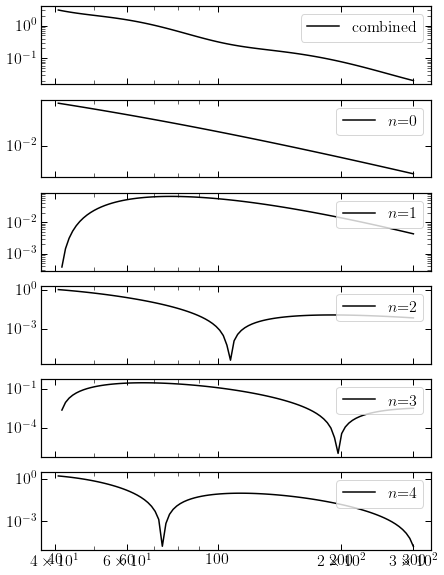

In [55]:
fig, ax = subplots(6, 1, figsize=(7, 10), sharex=True)
for n in range(0, 5):
    rho = rho_nlm(r_halo, n, 0)
    rho_total += rho
    max_rho = np.max(rho)
    ax[n+1].loglog(r_halo*40.85, rho, label='$n$={}'.format(n), c='k')
    ax[n+1].legend(ncol=1, loc='upper right')
    #ax[n+1].set_xticks([40, 60, 100, 200, 300])
    #ax[n+1].set_xticklabels([40, 60, 100, 200, 300])
    
ax[0].loglog(r_halo*40.85, rho_profile, c='k', label='combined')
ax[0].legend()
ax[5].set_xticks([40, 60, 100, 200, 300])
ax[5].set_xticklabels(['', '', '', '', ''])
ax[5].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

savefig('more_energetic_radial.pdf', bbox_inches='tight')

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


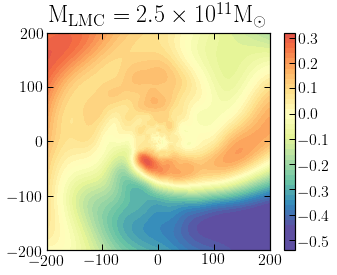

In [3]:
mass = 1.577212515E-6 
covmat_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC6_100M_new_b1_covmat_sample_'
coeff_mw_path = '../data/interim/BFE/MW/bfe_MW_81_MWLMC6_100M_new_b1_coeff_sample_'

snap_n = 114
S_mw, T_mw, N_mw, SN_out = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 10, 20, 20, 20, 
                                        4, mass, snap=114, sn_out=1)



y_grid = np.arange(-200, 200, 1.5)
z_grid = np.arange(-200, 200, 1.5)
y_grid, z_grid = meshgrid(y_grid, z_grid)
bins=len(np.arange(-200, 200, 1.5))

xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                     y_grid.flatten(),
                                     z_grid.flatten()]).T)

rho_biff = biff.density(np.ascontiguousarray(xyz), S_mw, T_mw, M=1, r_s=40.85)

S_000 = np.zeros((1, 1, 1))
T_000 = np.zeros((1, 1, 1))
S_000[0][0][0] = S_mw[0][0][0]

rho_biff_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)


figsize(5,4)
title(r'$\rm{M}_{LMC}=2.5\times 10^{11} \rm{M}_{\odot}$')
contourf(y_grid, z_grid, ((rho_biff/rho_biff_base)-1).reshape(bins, bins), 50,
         origin='lower', cmap='Spectral_r', vmin=-0.45, vmax=0.45)

xlim(-200, 200)
ylim(-200, 200)
colorbar()

#savefig('wake_mwlmc6.pdf', bbox_inches='tight')


In [5]:
coeff_energy?

In [22]:
mass = 1.577212515E-6 
covmat_mw_path1 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC6_100M_new_b1_covmat_sample_'
coeff_mw_path1 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC6_100M_new_b1_coeff_sample_'

covmat_mw_path2 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC5_100M_new_b0_covmat_sample_'
coeff_mw_path2 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC5_100M_new_b0_coeff_sample_'

covmat_mw_path3 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC4_100M_new_b0_covmat_sample_'
coeff_mw_path3 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC4_100M_new_b0_coeff_sample_'

covmat_mw_path4 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_covmat_sample_'
coeff_mw_path4 = '../data/interim/BFE/MW/bfe_MW_81_MWLMC3_100M_new_b0_coeff_sample_'

snap_n1 = 114
snap_n2 = 109
snap_n3 = 114
snap_n4 = 90



In [23]:
S_mw1, T_mw1, N_mw1, SN_out1 = smooth_coeff(coeff_mw_path1, covmat_mw_path1, 0, 10, 20, 20, 20, 
                                            4, mass, snap=snap_n1, sn_out=1)

S_mw2, T_mw2, N_mw2, SN_out2 = smooth_coeff(coeff_mw_path2, covmat_mw_path2, 0, 10, 20, 20, 20, 
                                            4, mass, snap=snap_n2, sn_out=1)

S_mw3, T_mw3, N_mw3, SN_out3 = smooth_coeff(coeff_mw_path3, covmat_mw_path3, 0, 10, 20, 20, 20, 
                                            4, mass, snap=snap_n3, sn_out=1)

S_mw4, T_mw4, N_mw4, SN_out4 = smooth_coeff(coeff_mw_path4, covmat_mw_path4, 0, 10, 20, 20, 20, 
                                            4, mass, snap=snap_n4, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [26]:
print(N_mw1, N_mw2, N_mw3, N_mw4)

335 277 297 270


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


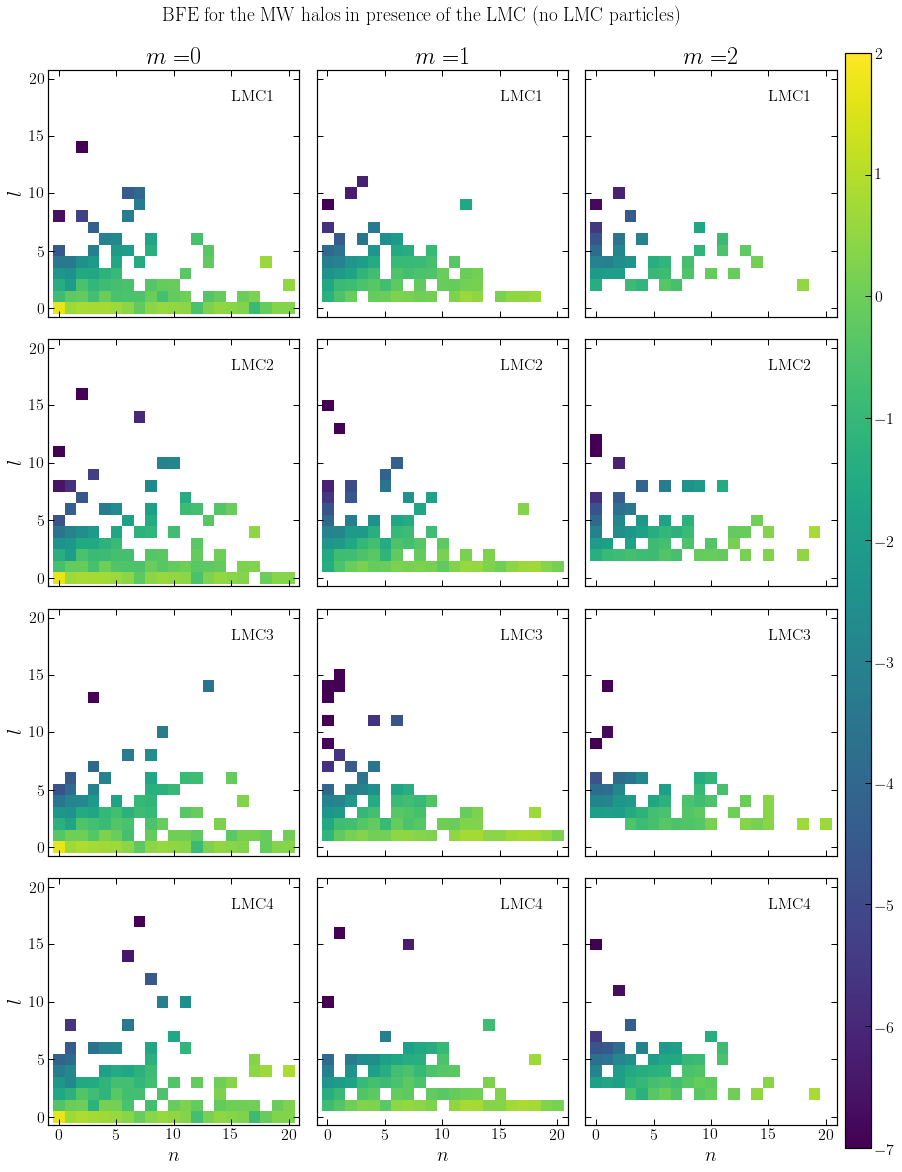

In [58]:
fig, ax = subplots(4,3, figsize=(12, 16), sharey=True, sharex=True)

coeff_energy(ax[3][0], S_mw1, T_mw1, 0, 21, 21, -7, 2)
coeff_energy(ax[3][1], S_mw1, T_mw1, 1, 21, 21, -7, 2)
coeff_energy(ax[3][2], S_mw1, T_mw1, 2, 21, 21, -7, 2)

coeff_energy(ax[2][0], S_mw2, T_mw2, 0, 21, 21, -7, 2)
coeff_energy(ax[2][1], S_mw2, T_mw2, 1, 21, 21, -7, 2)
coeff_energy(ax[2][2], S_mw2, T_mw2, 2, 21, 21, -7, 2)

coeff_energy(ax[1][0], S_mw3, T_mw3, 0, 21, 21, -7, 2)
coeff_energy(ax[1][1], S_mw3, T_mw3, 1, 21, 21, -7, 2)
coeff_energy(ax[1][2], S_mw3, T_mw3, 2, 21, 21, -7, 2)

coeff_energy(ax[0][0], S_mw4, T_mw4, 0, 21, 21, -7, 2)
coeff_energy(ax[0][1], S_mw4, T_mw4, 1, 21, 21, -7, 2)
im = coeff_energy(ax[0][2], S_mw4, T_mw4, 2, 21, 21, -7, 2)

cbar_ax = fig.add_axes([0.99, 0.03, 0.03, 0.95])

for i in range(3):
    ax[3][i].set_xlabel('$n$')
    ax[i][0].set_ylabel('$l$')
    ax[0][i].set_title('$m=${}'.format(i))
    ax[0][i].text(15, 18, 'LMC1')
    ax[1][i].text(15, 18, 'LMC2')
    ax[2][i].text(15, 18, 'LMC3')
    ax[3][i].text(15, 18, 'LMC4')

ax[3][0].set_ylabel('$l$')
fig.tight_layout()
fig.colorbar(im, cax=cbar_ax)
fig.suptitle('BFE for the MW halos in presence of the LMC (no LMC particles)', y=1.02)

savefig('all_bfe_mw.pdf', bbox_inches='tight')